In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
from scipy.stats import linregress
import matplotlib.font_manager as font_manager

title_font = font_manager.FontProperties(family='Times New Roman', size=16, weight='normal')
label_font = font_manager.FontProperties(family='Times New Roman', size=16, weight='bold')
label_special_font = font_manager.FontProperties(family='Times New Roman', size=20, weight='bold')
legend_font = font_manager.FontProperties(family='Times New Roman', size=14, weight='normal')
legend_special_font = font_manager.FontProperties(family='Times New Roman', size=16, weight='bold')
special_tick_size=15
size_marker=90

character_power=r'$\eta$'

# Lattice

In [14]:
#range of network size and 
log_L_list=np.array(range(7,17))
L_list=[]
for z in log_L_list:
    L_list.append(int(1.4**z))
L_list=np.array(L_list)
N_list=L_list**2
print("System Size:")
print(N_list)

System Size:
[  100   196   400   784  1600  3136  6241 12321 24025 47089]


In [15]:
#generate ticks to show (10 base)
def tranform_ticks_log(log_value_min,log_value_max,max_to_show=3):
    if(log_value_max-log_value_min<=1.3):
        return [10**int((log_value_min+log_value_max)/2)]
    seperate=list(range(int(log_value_min),int(log_value_max)+1))
    if(len(seperate)<=max_to_show):
        ss=seperate
    else:
        add=int((log_value_max-log_value_min)/max_to_show)+1
        z=int(log_value_min)
        ss=[]
        while(len(ss)<max_to_show):
            ss.append(z)
            z+=add
    ticks=[]
    for s in ss:
        ticks.append(10**s)
    return ticks

#generate ticks to show (2 base)
def tranform_ticks_log2(log_value_min,log_value_max,max_to_show=3):
    seperate=list(range(int(log_value_min),int(log_value_max)+1))
    if(len(seperate)<=max_to_show):
        ss=seperate
    else:
        add=int((log_value_max-log_value_min)/max_to_show)+1
        z=int(log_value_min)
        ss=[]
        while(len(ss)<max_to_show):
            ss.append(z)
            z+=add
    ticks=[]
    for s in ss:
        ticks.append(10**s)
    return ticks

# Cayley

Cayley
power=0.5
Best: R^2=0.91
orange: R^2=0.63
green: R^2=0.63


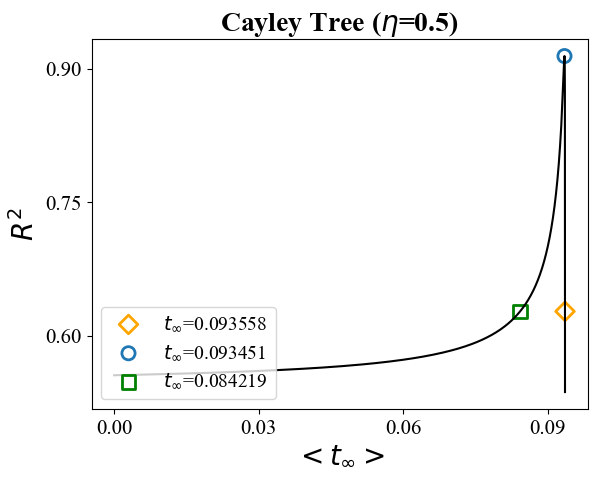

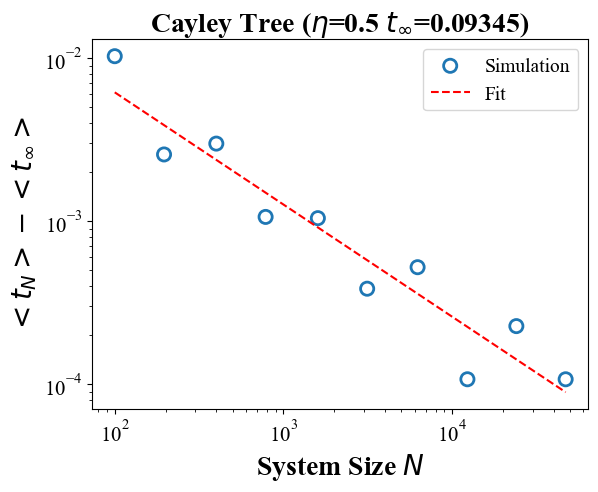

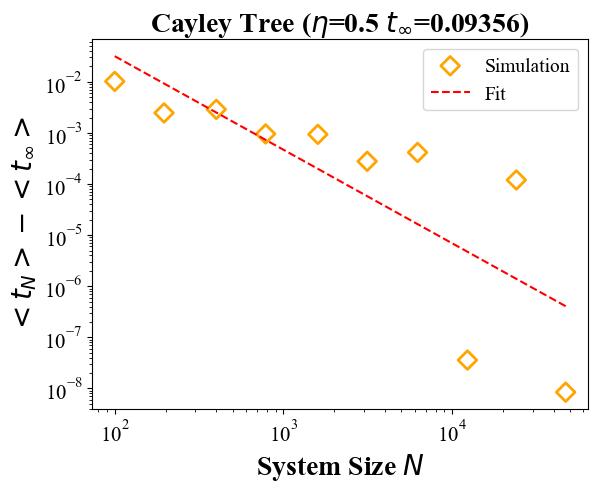

[0.1]


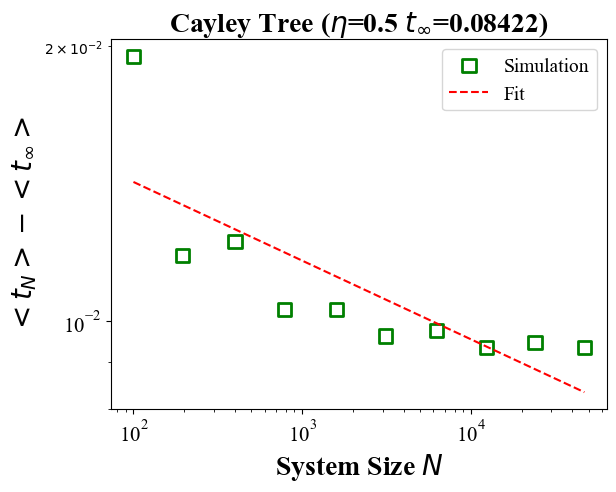

Cayley
power=1
Best: R^2=0.82
orange: R^2=0.59
green: R^2=0.59


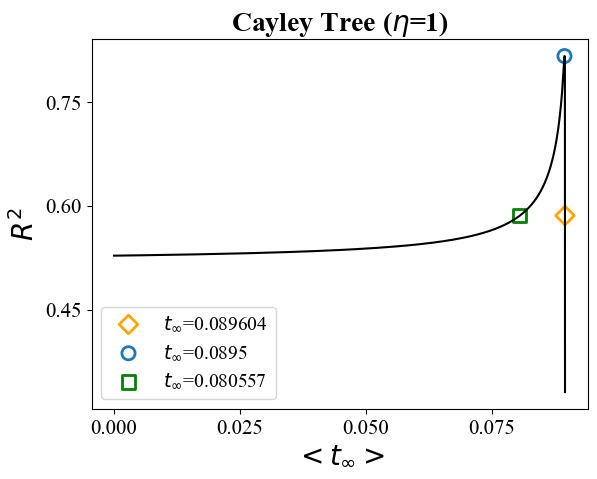

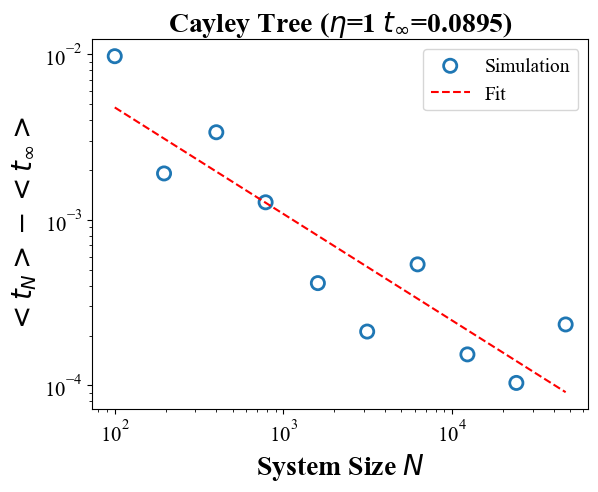

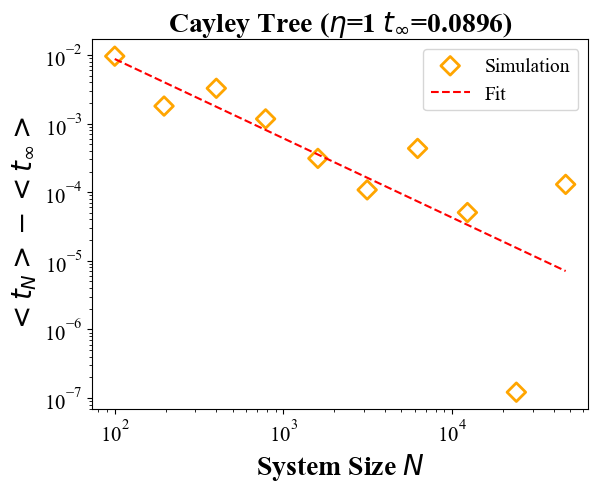

[0.1]


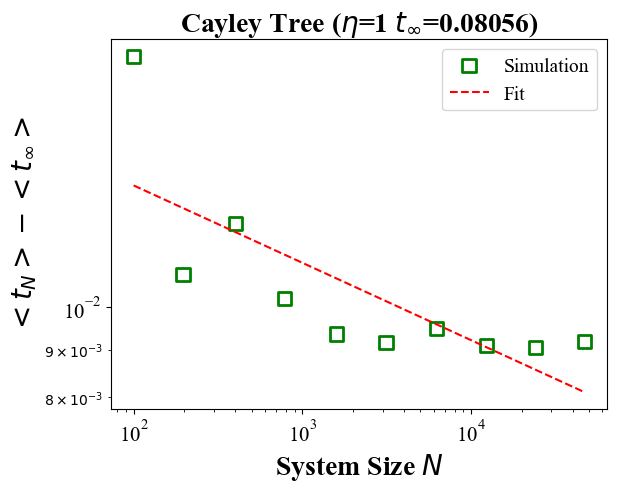

Cayley
power=2
Best: R^2=0.68
orange: R^2=0.47
green: R^2=0.47


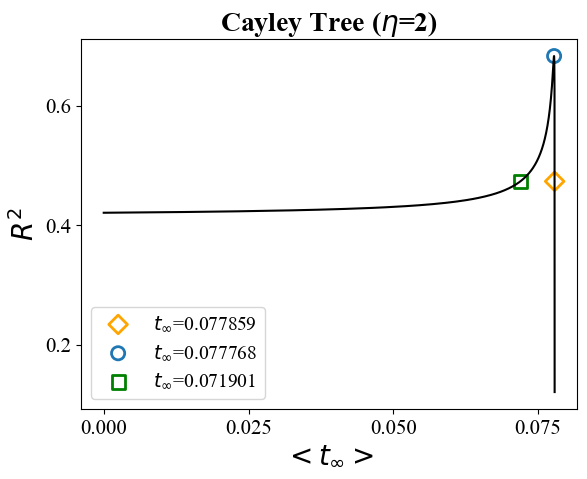

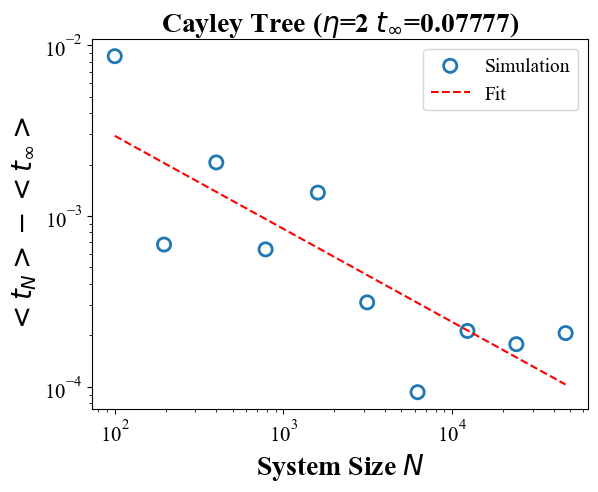

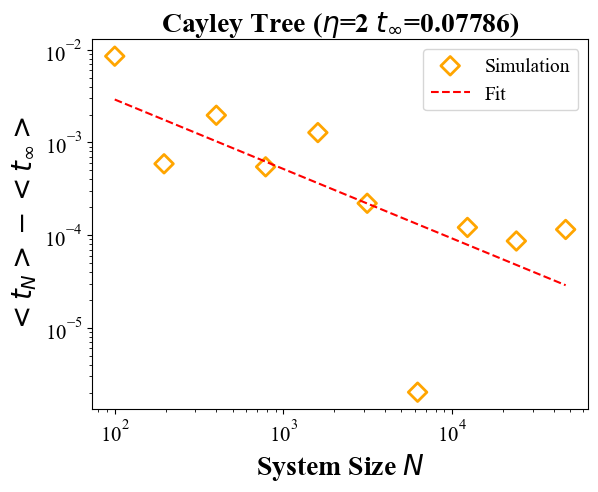

[0.01]


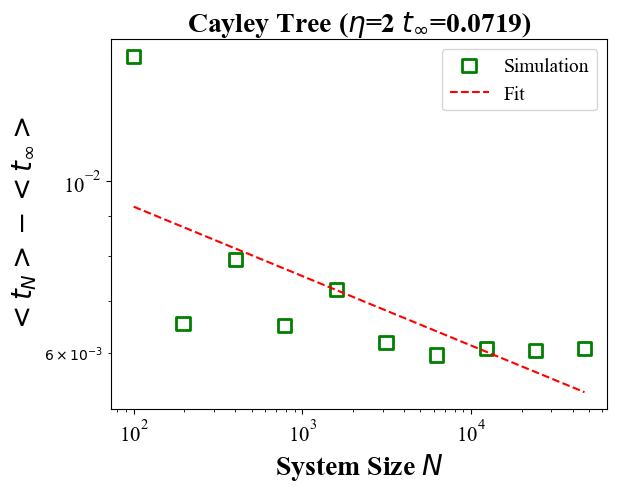

In [16]:
from matplotlib.ticker import LogLocator, MultipleLocator, MaxNLocator

net_name='Cayley'
net_name_show='Cayley Tree'


power_list=[0.5,1,2]
phi=1
shape_parameter_for_coupling=2

line_width_marker_set=2
max_tick_num=4
dpi_set=1000
marker_blue,marker_green,marker_yellow='o','s','D'


line_width_marker_set=2
max_tick_num=4
for power in power_list:
    mean_list=[]
    std_list=[]
    for N in N_list:
        lifetime_data=[]
        file_name=net_name+'_N='+str(N)+'_'+'power='+str(power)+'_shape='+str(shape_parameter_for_coupling)+'_phi='+str(phi)+'.txt'

        f=open('./life_data/'+net_name+'/'+file_name,'r')
        line=f.readline()
        while(line!=''):
            lifetime_data.append(float(line))
            line=f.readline()
        f.close()
        lifetime_data=lifetime_data[:500]
        mean_list.append(np.mean(lifetime_data))
        std_list.append(np.std(lifetime_data))
    #获取 不同t_inf下对应的R^2
    def R2_cal(mean_limit):   
        x_list=np.log(N_list)
        y_list=np.log(mean_list-mean_limit)
        return (np.corrcoef(x_list, y_list)[0, 1])**2
    def object_func(mean_limit):
        return -R2_cal(mean_limit)
    def judge_R_diff(R_list,threshold):
        max_diff=0
        for i in range(len(R_list)-1):
            max_diff=max(max_diff,abs(R_list[i+1]-R_list[i]))
        return max_diff<threshold
    threshold=0.001
    mean_limit_list=np.min(mean_list)-10**(np.linspace(-13,np.log(np.min(mean_list))/np.log(10),10))
    R_list=[]
    for mean_limit in mean_limit_list:
        R_list.append(R2_cal(mean_limit))
    while (not judge_R_diff(R_list,threshold)):
        new_mean_limit_list=[mean_limit_list[0]]
        new_R_list=[R_list[0]]
        for index_mean in range(len(mean_limit_list)-1):
            if(np.abs(R_list[index_mean+1]-R_list[index_mean])>threshold):
                insert_mean_limit=(mean_limit_list[index_mean+1]+mean_limit_list[index_mean])/2
                insert_R=R2_cal(insert_mean_limit)
                new_mean_limit_list.append(insert_mean_limit)
                new_R_list.append(insert_R)
            new_mean_limit_list.append(mean_limit_list[index_mean+1])
            new_R_list.append(R_list[index_mean+1])
        mean_limit_list=new_mean_limit_list
        R_list=new_R_list
    best_mean_limit=mean_limit_list[np.argmax(R_list)]
    mean_limit_left_list=mean_limit_list[:np.argmax(R_list)]
    R_list_left_list=np.array(R_list[:np.argmax(R_list)])
    mean_limit_right_list=mean_limit_list[np.argmax(R_list):]
    R_list_right_list=np.array(R_list[np.argmax(R_list):])
    suboptimal_left=(0.2*np.max(R_list)+0.8*np.min(R_list_left_list))
    suboptimal_right=(0.2*np.max(R_list)+0.8*np.min(R_list_right_list))
    suboptimal=max(suboptimal_right,suboptimal_left)
    R_left=R_list_left_list[np.argmin(np.abs(R_list_left_list-suboptimal))]
    mean_limit_left=mean_limit_left_list[np.argmin(np.abs(R_list_left_list-suboptimal))]
    R_right=R_list_right_list[np.argmin(np.abs(R_list_right_list-suboptimal))]
    mean_limit_right=mean_limit_right_list[np.argmin(np.abs(R_list_right_list-suboptimal))]
    #draw the best t_infinity
    plt.plot(mean_limit_list,R_list,c='black',linestyle='-')
    
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=max_tick_num))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=max_tick_num))
    plt.xticks(fontproperties = 'Times New Roman', size = special_tick_size)
    plt.yticks(fontproperties = 'Times New Roman', size = special_tick_size)    
    print(net_name)
    print("power="+str(power))
    print("Best: R^2="+str(round(R_list[np.argmax(R_list)],2)))
    print("orange: R^2="+str(round(R_left,2)))
    print("green: R^2="+str(round(R_right,2)))
    plt.scatter(mean_limit_left,R_left,edgecolors='orange',marker=marker_yellow,linewidth=line_width_marker_set,facecolors='none',label=r'$t_{\infty}$='+str(round(mean_limit_left,6)),s=size_marker)
    plt.scatter(best_mean_limit,np.max(R_list),edgecolors='#1f77b4',marker=marker_blue,linewidth=line_width_marker_set,facecolors='none',label=r'$t_{\infty}$='+str(round(best_mean_limit,6)),s=size_marker)
    plt.scatter(mean_limit_right,R_right,edgecolors='green',marker=marker_green,linewidth=line_width_marker_set,facecolors='none',label=r'$t_{\infty}$='+str(round(mean_limit_right,6)),s=size_marker)
    plt.legend(loc='lower left',prop=legend_font)
    plt.ylabel(r"$R^2$",fontproperties=label_special_font)
    plt.xlabel(r"$<t_{\infty}>$",fontproperties=label_special_font)
    plt.title(net_name_show+" ("+character_power+"="+str(power)+")",fontproperties=label_special_font)
    file_save_name='Mean_R2_mean_'+net_name_show+" ("+"power="+str(power)+").svg"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()

    #The best fitting for the scaling law of mean lifetime
    plt.scatter(N_list,mean_list-best_mean_limit,linewidth=line_width_marker_set,edgecolors='#1f77b4',marker=marker_blue, facecolors='none',label='Simulation',s=size_marker)
    x_list=np.log(N_list)
    y_list=np.log(mean_list-best_mean_limit)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')

    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-best_mean_limit)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)
    
    
    plt.xticks(fontproperties = 'Times New Roman', size=special_tick_size)  # 设置x轴刻度字体大小为special_tick_size
    plt.yticks(fontproperties = 'Times New Roman', size=special_tick_size)  # 设置y轴刻度字体大小为special_tick_size
    
    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(net_name_show+" ("+character_power+"="+str(power)+" "r'$t_{\infty}$='+str(round(best_mean_limit,5))+")",fontproperties=label_special_font)
    plt.legend(prop=legend_font)
    file_save_name='Mean_best_'+net_name_show+" ("+"power="+str(power)+")"+".png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()

    plt.scatter(N_list,mean_list-mean_limit_left,linewidth=line_width_marker_set,edgecolors='orange',marker=marker_yellow, facecolors='none',label='Simulation',s=size_marker)
    x_list=np.log(N_list)
    y_list=np.log(mean_list-mean_limit_left)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    # 计算回归线上的预测值
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')
    
    
    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-mean_limit_left)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)  
    plt.xticks(fontproperties = 'Times New Roman', size=special_tick_size)  # 设置x轴刻度字体大小为special_tick_size
    plt.yticks(fontproperties = 'Times New Roman', size=special_tick_size)  # 设置y轴刻度字体大小为special_tick_size

    
    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(net_name_show+" ("+character_power+"="+str(power)+" "r'$t_{\infty}$='+str(round(mean_limit_left,5))+")",fontproperties=label_special_font)
    plt.legend(prop=legend_font)
    file_save_name='Mean_rightBad_'+net_name_show+" ("+"power="+str(power)+")"+"R^2="+str(round(r_value**2,4))+".png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()

        #Fitting for the scaling law of mean lifetime when choosing suboptimal t_infinity (right suboptimal)
    plt.scatter(N_list,mean_list-mean_limit_right,linewidth=line_width_marker_set,edgecolors='green',marker=marker_green, facecolors='none',label='Simulation',s=size_marker)
    x_list=np.log(N_list)
    y_list=np.log(mean_list-mean_limit_right)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    # 计算回归线上的预测值
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')


    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-mean_limit_right)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)
    print(yticks)
    
    
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

    plt.xticks(fontproperties = 'Times New Roman', size = special_tick_size)
    plt.yticks(fontproperties = 'Times New Roman', size = special_tick_size)

    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(net_name_show+" ("+character_power+"="+str(power)+" "r'$t_{\infty}$='+str(round(mean_limit_right,5))+")",fontproperties=label_special_font)

    plt.legend(prop=legend_font)
    file_save_name='Mean_leftBad_'+net_name_show+" ("+"power="+str(power)+")"+"R^2="+str(round(r_value**2,4))+".png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()


orange: 0.6273
green: 0.6273


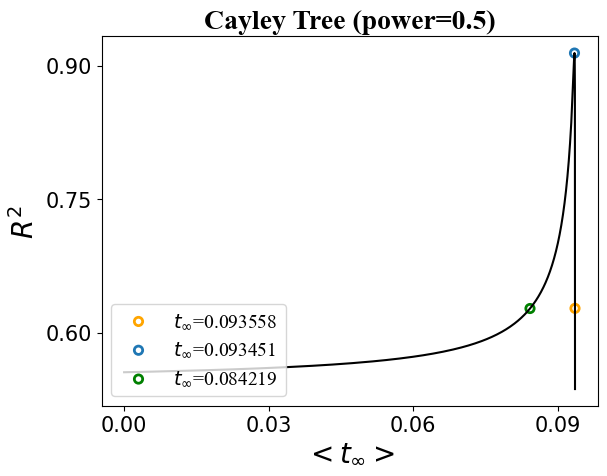

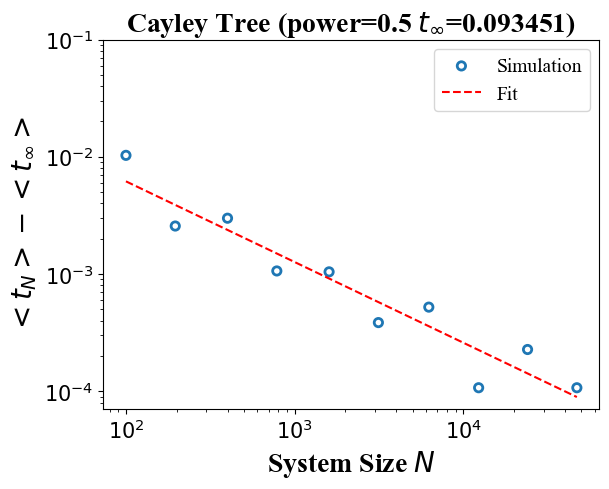

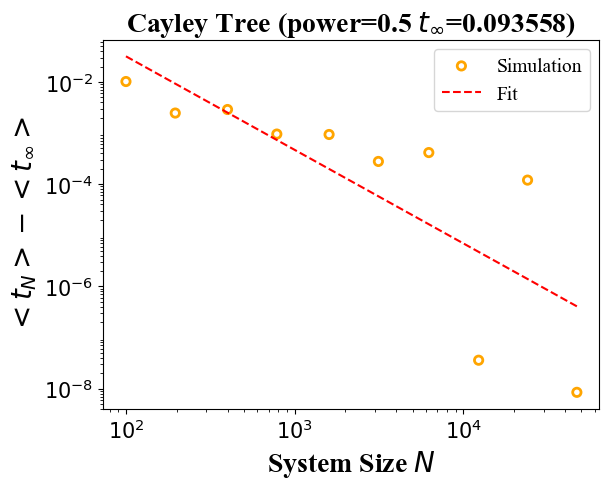

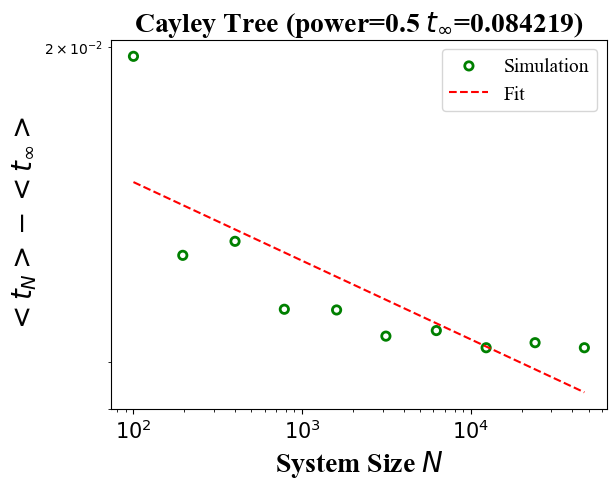

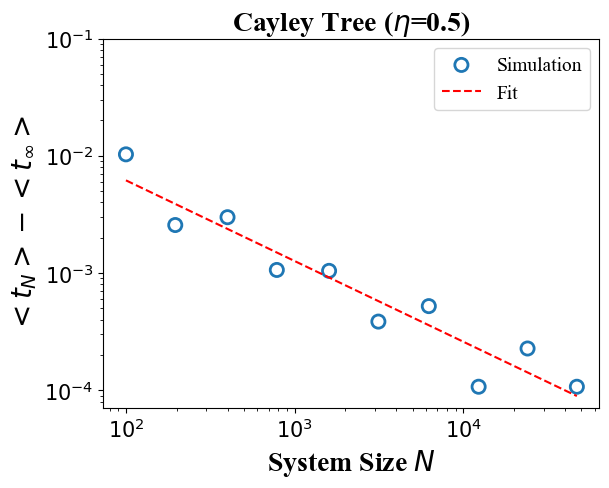

begin saving
slope:: -0.6883283113522497
intercept:-1.9182811279643532
r_value : -0.9561024832690114
p-value : 1.5405459591590102e-05


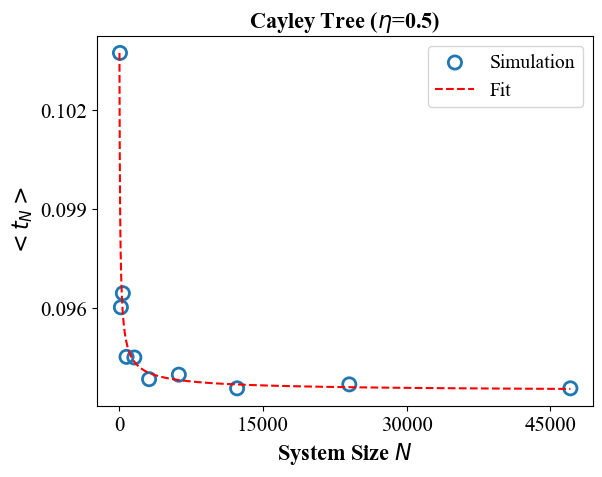

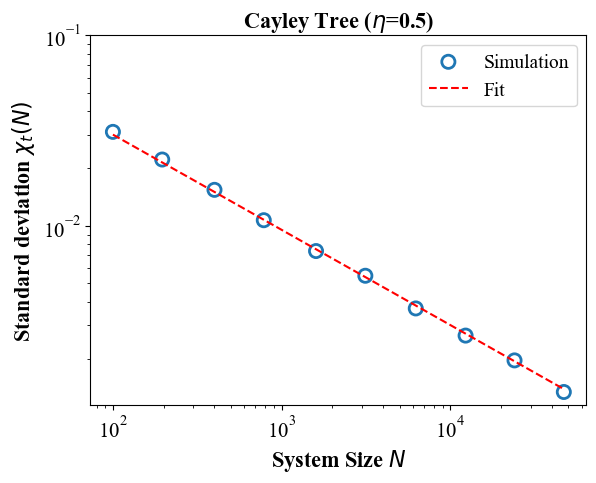

slope:: -0.5
intercept:-1.199690097752458
r_value : -0.9998363273195686
p-value : 3.1390449558816946e-15


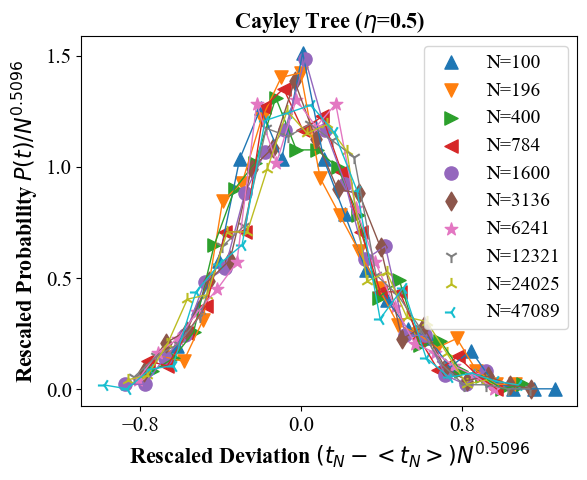

power=0.5
c1=0.1469 delta=-0.6883 alpha=0.5096


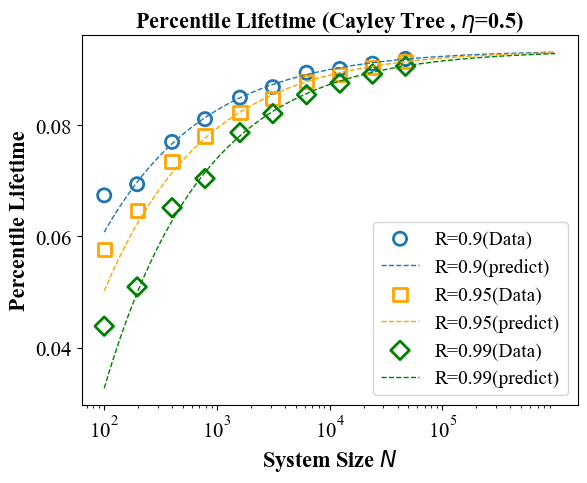

orange: 0.5859
green: 0.5859


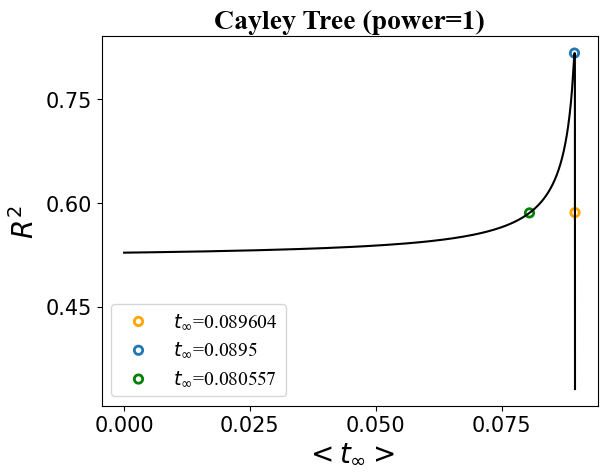

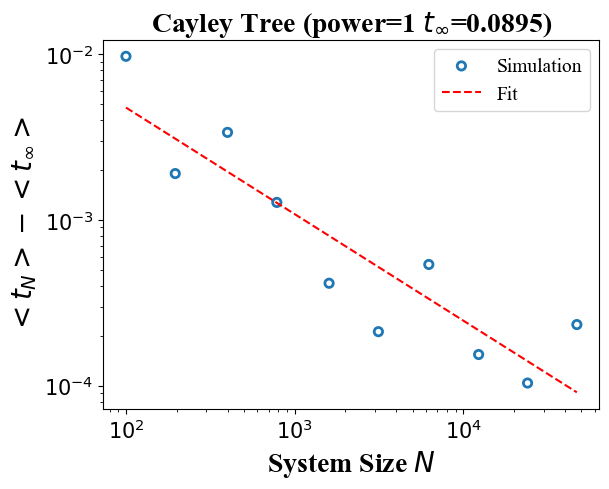

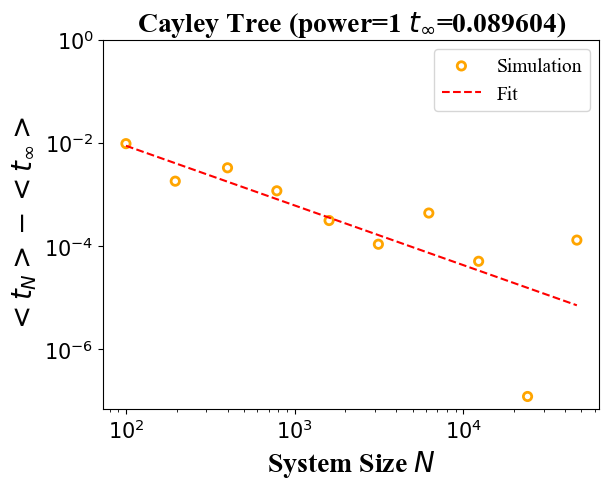

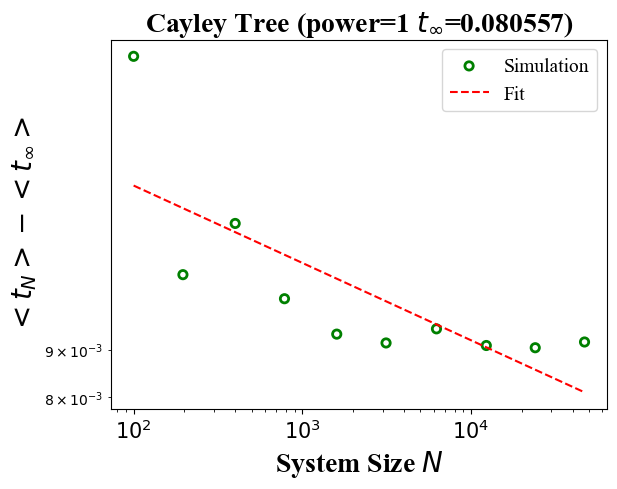

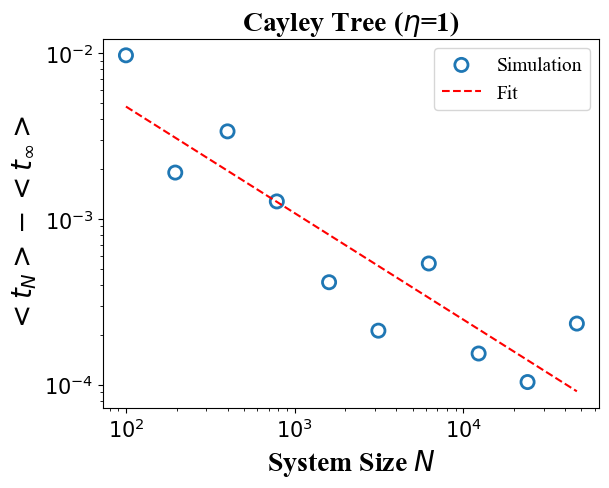

begin saving
slope:: -0.6430791809950623
intercept:-2.3849240741589286
r_value : -0.9035676947083303
p-value : 0.0003362830105131418


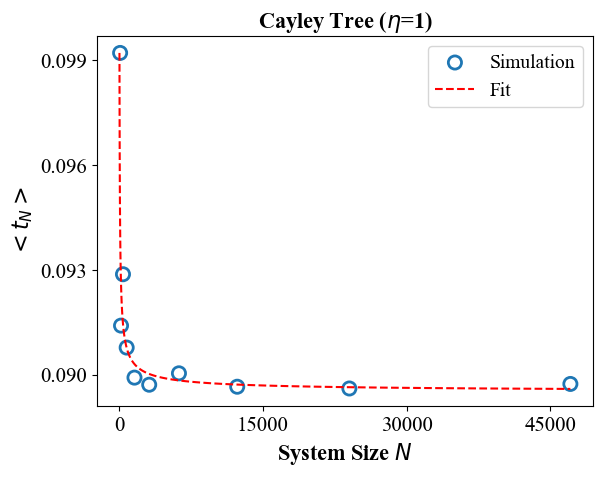

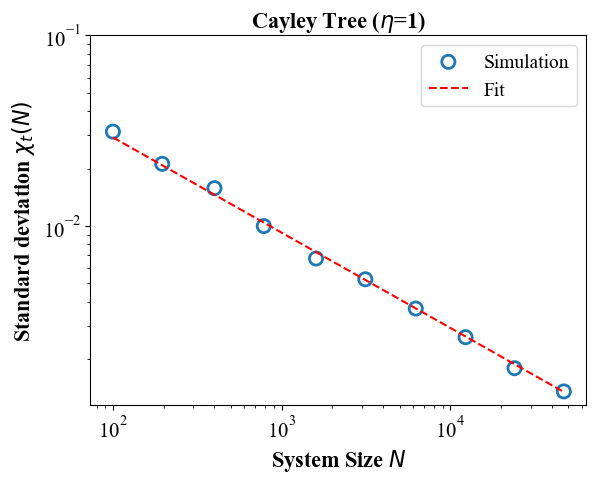

slope:: -0.5
intercept:-1.2326379961728318
r_value : -0.9991570559735071
p-value : 2.206650921362368e-12


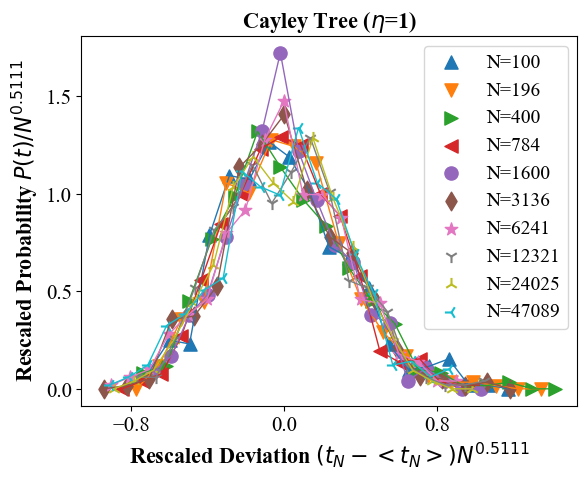

power=1
c1=0.0921 delta=-0.6431 alpha=0.5111


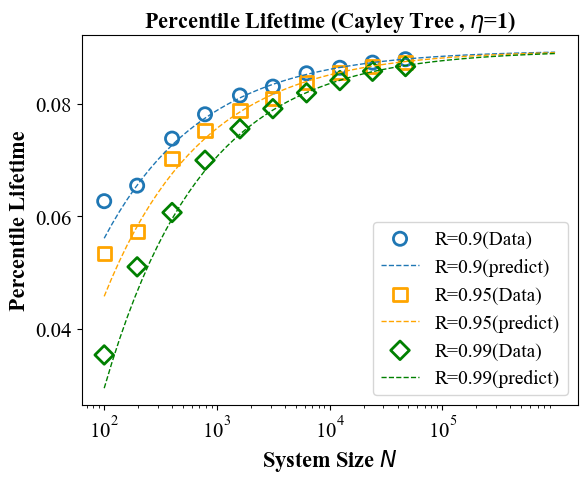

orange: 0.4733
green: 0.4733


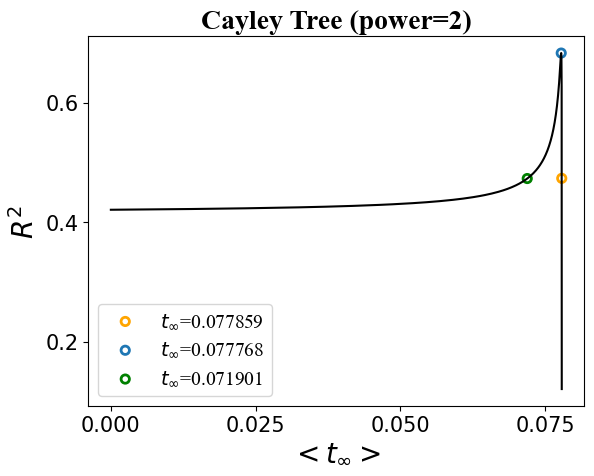

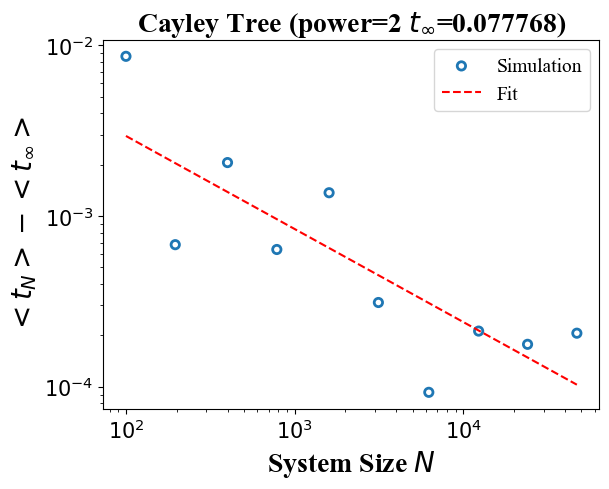

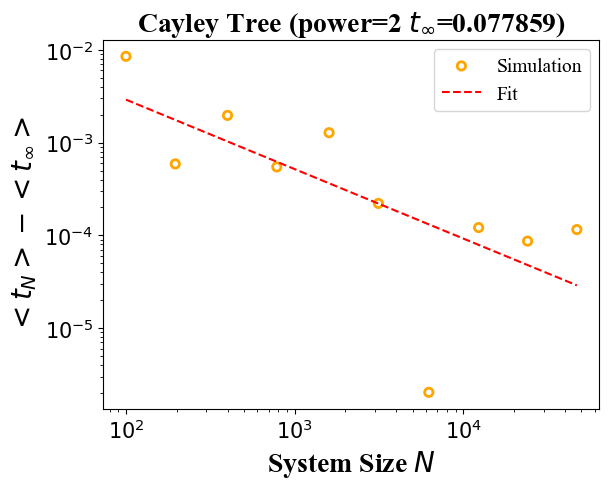

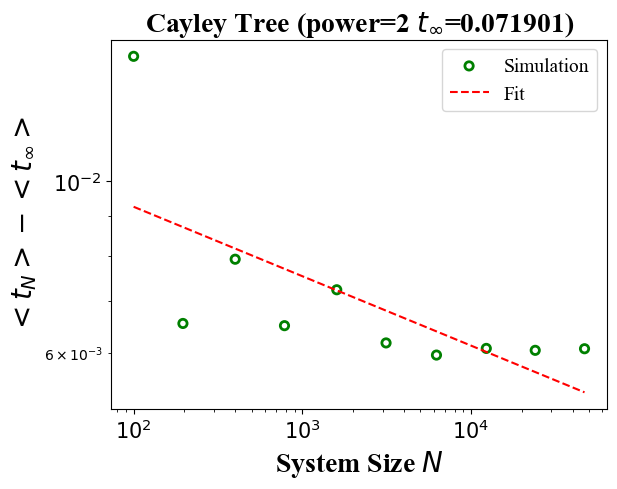

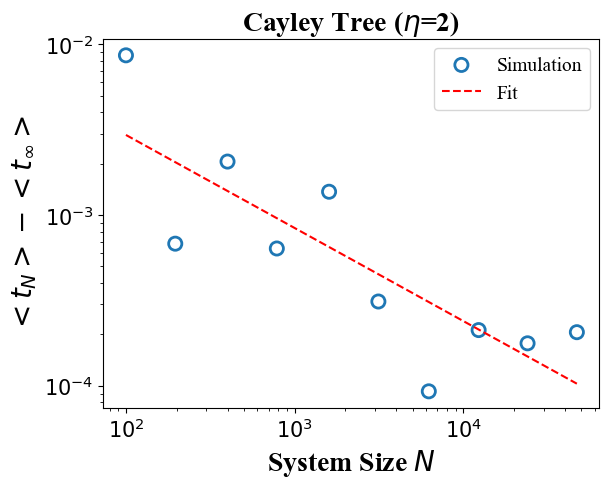

begin saving
slope:: -0.5448636542527976
intercept:-3.3184905042338695
r_value : -0.8264627428632092
p-value : 0.0031997851013724206


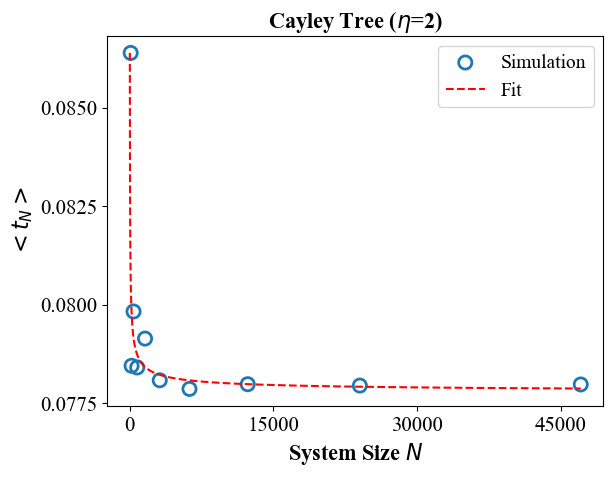

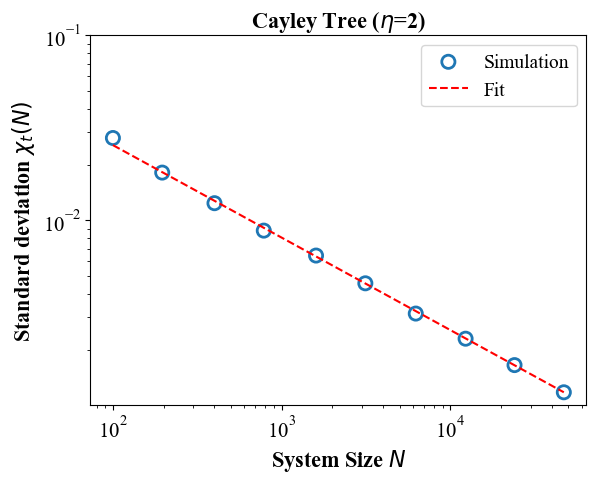

slope:: -0.5
intercept:-1.3663203372155923
r_value : -0.9994973041866504
p-value : 2.7921395776414335e-13


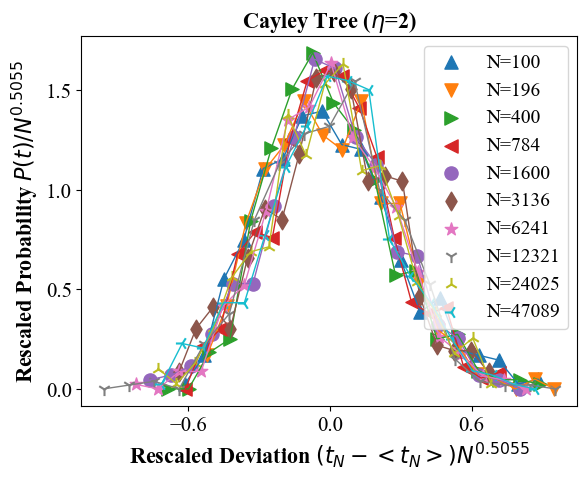

power=2
c1=0.0362 delta=-0.5449 alpha=0.5055


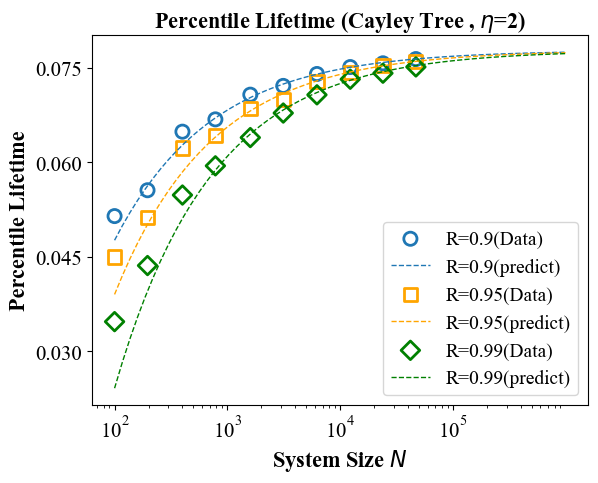

In [17]:
from matplotlib.ticker import LogLocator, MultipleLocator, MaxNLocator


net_name='Lattice'
net_name_show='Lattice Network'

net_name='BA'
net_name_show='Barabasi-Albert Network'

net_name='Cayley'
net_name_show='Cayley Tree'

power_list=[0.5,1,2]
phi=1
shape_parameter_for_coupling=2

for power in power_list:
    mean_list=[]
    std_list=[]
    for N in N_list:
        lifetime_data=[]
        file_name=net_name+'_N='+str(N)+'_'+'power='+str(power)+'_shape='+str(shape_parameter_for_coupling)+'_phi='+str(phi)+'.txt'

        f=open('./life_data/'+net_name+'/'+file_name,'r')
        line=f.readline()
        while(line!=''):
            lifetime_data.append(float(line))
            line=f.readline()
        f.close()
        lifetime_data=lifetime_data[:500]
        mean_list.append(np.mean(lifetime_data))
        std_list.append(np.std(lifetime_data))
    #calculate R2 when t_infinity achieve different values.
    def R2_cal(mean_limit):   
        x_list=np.log(N_list)
        y_list=np.log(mean_list-mean_limit)
        return (np.corrcoef(x_list, y_list)[0, 1])**2
    def object_func(mean_limit):
        return -R2_cal(mean_limit)
    def judge_R_diff(R_list,threshold):
        max_diff=0
        for i in range(len(R_list)-1):
            max_diff=max(max_diff,abs(R_list[i+1]-R_list[i]))
        return max_diff<threshold
    threshold=0.001
    mean_limit_list=np.min(mean_list)-10**(np.linspace(-13,np.log(np.min(mean_list))/np.log(10),10))
    R_list=[]
    for mean_limit in mean_limit_list:
        R_list.append(R2_cal(mean_limit))
    while (not judge_R_diff(R_list,threshold)):
        new_mean_limit_list=[mean_limit_list[0]]
        new_R_list=[R_list[0]]
        for index_mean in range(len(mean_limit_list)-1):
            if(np.abs(R_list[index_mean+1]-R_list[index_mean])>threshold):
                insert_mean_limit=(mean_limit_list[index_mean+1]+mean_limit_list[index_mean])/2
                insert_R=R2_cal(insert_mean_limit)
                new_mean_limit_list.append(insert_mean_limit)
                new_R_list.append(insert_R)
            new_mean_limit_list.append(mean_limit_list[index_mean+1])
            new_R_list.append(R_list[index_mean+1])
        mean_limit_list=new_mean_limit_list
        R_list=new_R_list
    best_mean_limit=mean_limit_list[np.argmax(R_list)]
    mean_limit_left_list=mean_limit_list[:np.argmax(R_list)]
    R_list_left_list=np.array(R_list[:np.argmax(R_list)])
    mean_limit_right_list=mean_limit_list[np.argmax(R_list):]
    R_list_right_list=np.array(R_list[np.argmax(R_list):])
    suboptimal_left=(0.2*np.max(R_list)+0.8*np.min(R_list_left_list))
    suboptimal_right=(0.2*np.max(R_list)+0.8*np.min(R_list_right_list))
    suboptimal=max(suboptimal_right,suboptimal_left)
    R_left=R_list_left_list[np.argmin(np.abs(R_list_left_list-suboptimal))]
    mean_limit_left=mean_limit_left_list[np.argmin(np.abs(R_list_left_list-suboptimal))]
    R_right=R_list_right_list[np.argmin(np.abs(R_list_right_list-suboptimal))]
    mean_limit_right=mean_limit_right_list[np.argmin(np.abs(R_list_right_list-suboptimal))]
    
    #draw the best t_infinity
    plt.plot(mean_limit_list,R_list,c='black',linestyle='-')
    
    
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=max_tick_num))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=max_tick_num))
    ax = plt.gca()
    ax.tick_params(axis='x', labelsize=special_tick_size)  
    ax.tick_params(axis='y', labelsize=special_tick_size) 
    
    print("orange: "+str(round(R_left,4)))
    print("green: "+str(round(R_left,4)))
    plt.scatter(mean_limit_left,R_left,edgecolors='orange',linewidth=line_width_marker_set,facecolors='none',label=r'$t_{\infty}$='+str(round(mean_limit_left,6)))
    plt.scatter(best_mean_limit,np.max(R_list),edgecolors='#1f77b4',linewidth=line_width_marker_set,facecolors='none',label=r'$t_{\infty}$='+str(round(best_mean_limit,6)))
    plt.scatter(mean_limit_right,R_right,edgecolors='green',linewidth=line_width_marker_set,facecolors='none',label=r'$t_{\infty}$='+str(round(mean_limit_right,6)))
    plt.legend(loc='lower left',prop=legend_font)
    plt.ylabel(r"$R^2$",fontproperties=label_special_font)
    plt.xlabel(r"$<t_{\infty}>$",fontproperties=label_special_font)
    plt.title(net_name_show+" ("+"power="+str(power)+")",fontproperties=label_special_font)
    file_save_name='Mean_R2_mean_'+net_name_show+" ("+"power="+str(power)+").svg"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()

    #The best fitting for the scaling law of mean lifetime
    plt.scatter(N_list,mean_list-best_mean_limit,marker='o',linewidth=line_width_marker_set,edgecolors='#1f77b4', facecolors='none',label='Simulation')
    x_list=np.log(N_list)
    y_list=np.log(mean_list-best_mean_limit)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    #plt.title(net_name_show+" ("+"power="+str(power)+")",fontproperties=label_font)
    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-best_mean_limit)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)   
    ax = plt.gca()
    ax.tick_params(axis='x', labelsize=special_tick_size) 
    ax.tick_params(axis='y', labelsize=special_tick_size) 
    
    plt.title(net_name_show+" ("+"power="+str(power)+" "r'$t_{\infty}$='+str(round(best_mean_limit,6))+")",fontproperties=label_special_font)
    plt.legend(prop=legend_font)
    file_save_name='Mean_best_'+net_name_show+" ("+"power="+str(power)+")"+".png"
    #plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()

    #Fitting for the scaling law of mean lifetime when choosing suboptimal t_infinity (left suboptimal)
    plt.scatter(N_list,mean_list-mean_limit_left,marker='o',linewidth=line_width_marker_set,edgecolors='orange', facecolors='none',label='Simulation')
    x_list=np.log(N_list)
    y_list=np.log(mean_list-mean_limit_left)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')
    plt.xscale('log')
    plt.yscale('log')
    
    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-mean_limit_left)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)  
    ax = plt.gca()
    ax.tick_params(axis='x', labelsize=special_tick_size)  # 设置x轴刻度字体大小为special_tick_size
    ax.tick_params(axis='y', labelsize=special_tick_size)  # 设置y轴刻度字体大小为special_tick_size


    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    #plt.title(net_name_show+" ("+"power="+str(power)+")",fontproperties=label_font)
    plt.title(net_name_show+" ("+"power="+str(power)+" "r'$t_{\infty}$='+str(round(mean_limit_left,6))+")",fontproperties=label_special_font)
    plt.legend(prop=legend_font)
    file_save_name='Mean_rightBad_'+net_name_show+" ("+"power="+str(power)+")"+"R^2="+str(round(r_value,4))+".png"
    #plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()

    #Fitting for the scaling law of mean lifetime when choosing suboptimal t_infinity (right suboptimal)
    plt.scatter(N_list,mean_list-mean_limit_right,marker='o',linewidth=line_width_marker_set,edgecolors='green', facecolors='none',label='Simulation')
    x_list=np.log(N_list)
    y_list=np.log(mean_list-mean_limit_right)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')
    plt.xscale('log')
    plt.yscale('log')
    ax = plt.gca()
    ax.tick_params(axis='x', labelsize=special_tick_size) 
    ax.tick_params(axis='y', labelsize=special_tick_size) 

    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-mean_limit_right)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)
    
    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    plt.title(net_name_show+" ("+"power="+str(power)+" "r'$t_{\infty}$='+str(round(mean_limit_right,6))+")",fontproperties=label_special_font)

    plt.legend(prop=legend_font)
    file_save_name='Mean_leftBad_'+net_name_show+" ("+"power="+str(power)+")"+"R^2="+str(round(r_value,4))+".png"
    #plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()
    
    plt.scatter(N_list,mean_list-best_mean_limit,marker='o',linewidth=line_width_marker_set,edgecolors='#1f77b4', facecolors='none',label='Simulation',s=size_marker)
    x_list=np.log(N_list)
    y_list=np.log(mean_list-best_mean_limit)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')
    
    plt.xscale('log')
    plt.yscale('log')
    ax = plt.gca()
    ax.tick_params(axis='x', labelsize=special_tick_size)  
    ax.tick_params(axis='y', labelsize=special_tick_size)

    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-best_mean_limit)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)   
    
    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    plt.title(net_name_show+" ("+character_power+"="+str(power)+")",fontproperties=label_special_font)
    plt.legend(prop=legend_font)
    file_save_name='Mean_loglog_'+net_name_show+" ("+"power="+str(power)+")"+".png"
    
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')

    plt.show()
    
    print("begin saving")
    t_inf=best_mean_limit.copy()
    delta=slope.copy()
    c1=np.exp(intercept)
    
    print(f'slope:: {slope}')
    print(f'intercept:{intercept}')
    print(f'r_value : {r_value}')
    print(f'p-value : {p_value}')
    
    
    x_min_to_show=(np.log(np.max(mean_list)-best_mean_limit)-intercept)/slope
    x_list_to_show=np.linspace(x_min_to_show,np.log(np.max(N_list)),100)
    plt.scatter(N_list,mean_list,linewidth=line_width_marker_set,edgecolors='#1f77b4', facecolors='none',label='Simulation',s=size_marker)
    regression_line_toshow = slope * x_list_to_show + intercept
    plt.plot(np.exp(x_list_to_show), np.exp(regression_line_toshow)+best_mean_limit, color='red', label='Fit',linestyle='--')
    plt.xlabel("System Size "+r"$N$",fontproperties=label_font)
    plt.ylabel(r"$<t_N>$",fontproperties=label_font)
    
    #y_to_show=np.linspace(np.min(mean_list),np.max(mean_list),3)
    #plt.yticks(y_to_show)    
    
    plt.xticks(fontproperties = 'Times New Roman', size = special_tick_size)
    plt.yticks(fontproperties = 'Times New Roman', size = special_tick_size)
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=4))
    
    plt.title(net_name_show+" ("+character_power+"="+str(power)+")",fontproperties=label_font)
    plt.legend(prop=legend_font)
    file_save_name='Mean_allFit_'+net_name_show+" ("+"power="+str(power)+").png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()
    
    
    #Scaling law of standard deviation
    plt.scatter(N_list,std_list,linewidth=line_width_marker_set,edgecolors='#1f77b4', facecolors='none',label='Simulation',s=size_marker)
    x_list=np.log(N_list)
    y_list=np.log(std_list)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    alpha=copy.deepcopy(slope) 
    slope=-0.5 # draw the straight line of slope 1/2
    intercept=np.mean(y_list)-np.mean(x_list)*slope
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')
    plt.xscale('log')
    plt.yscale('log')
    
    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(std_list)/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)   

    
    plt.xlabel("System Size "+r"$N$",fontproperties=label_font)
    plt.ylabel(r"Standard deviation $\chi_t(N)$",fontproperties=label_font)
    plt.title(net_name_show+" ("+character_power+"="+str(power)+")",fontproperties=label_font)
    plt.legend(prop=legend_font)
    plt.xticks(fontproperties = 'Times New Roman', size = special_tick_size)
    plt.yticks(fontproperties = 'Times New Roman', size = special_tick_size)
    file_save_name='std_'+net_name_show+" ("+"power="+str(power)+")"+".png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()
    print(f'slope:: {slope}')
    print(f'intercept:{intercept}')
    print(f'r_value : {r_value}')
    print(f'p-value : {p_value}')

    
    #calculate the universal function g by rescaling lifetime data
    marker_list=['^','v','>','<','o','d','*','1','2','3','4','+','x','|','_']
    for index_N in range(len(N_list)):
        N=N_list[index_N]
        density_marker=marker_list[index_N]
        lifetime_data=[]
        file_name=net_name+'_N='+str(N)+'_'+'power='+str(power)+'_shape='+str(shape_parameter_for_coupling)+'_phi='+str(phi)+'.txt'

        f=open('./life_data/'+net_name+'/'+file_name,'r')
        line=f.readline()
        while(line!=''):
            lifetime_data.append(float(line))
            line=f.readline()
        f.close()
        lifetime_data=lifetime_data[:500]
        min_life=np.min(lifetime_data)
        max_life=np.max(lifetime_data)
        cut_list=np.linspace(min_life,max_life,20)
        mid_list=[]
        distri_value_list=[]
        for index_cut in range(len(cut_list)-1):
            down=cut_list[index_cut]
            up=cut_list[index_cut+1]
            mid_list.append(((up+down)/2))
            distri_value_list.append(np.sum((lifetime_data>down)&(lifetime_data<up))/(len(lifetime_data)*(up-down)))
        distri_value_list=np.array(distri_value_list)
        mid_list=np.array(mid_list)
        plt.scatter((mid_list-np.mean(lifetime_data))/N**alpha,distri_value_list*N**alpha,marker=density_marker,label='N='+str(N),s=size_marker)
        plt.plot((mid_list-np.mean(lifetime_data))/N**alpha,distri_value_list*N**alpha,linewidth=1)
    plt.legend(prop=legend_font)
    plt.xlabel("Rescaled Deviation "+r"$(t_N-<t_N>)$"+r'$N^{{{}}}$'.format(round(-alpha,4)),fontproperties=label_font)
    plt.ylabel("Rescaled Probability "+r"$P(t)/$"+r'$N^{{{}}}$'.format(round(-alpha,4)),fontproperties=label_font)
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=4))
    
    plt.xticks(fontproperties = 'Times New Roman', size = special_tick_size)
    plt.yticks(fontproperties = 'Times New Roman', size = special_tick_size)

    plt.title(net_name_show+" ("+character_power+"="+str(power)+")",fontproperties=label_font)
    file_save_name='unifuc_'+net_name_show+" ("+"power="+str(power)+")"+".png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()
    

    
    
    #rescaled universal distribution, which correspond to g(delta t)
    all_scaled_samples=[]
    mean_list=[]
    for N in N_list:
        lifetime_data=[]
        file_name=net_name+'_N='+str(N)+'_'+'power='+str(power)+'_shape='+str(shape_parameter_for_coupling)+'_phi='+str(phi)+'.txt'
        f=open('./life_data/'+net_name+'/'+file_name,'r')
        line=f.readline()
        while(line!=''):
            lifetime_data.append(float(line))
            line=f.readline()
        f.close()
        lifetime_data=lifetime_data[:500]
        mean_list.append(np.mean(lifetime_data))
        lifetime_data=np.array(lifetime_data)-np.mean(lifetime_data)
        lifetime_data=lifetime_data*N**(-alpha)
        all_scaled_samples+=list(lifetime_data)


    #1. calculate quantile  from rescaled universal distribution
    Reliability_list=np.linspace(0.99,0.01,99)
    Reliability_list=np.arange(0.995,0.001,-0.001)

    kappa_list=[] # Quantile corresponding to different reliablity
    all_scaled_samples.sort()
    for Reliability in Reliability_list:
        rank=int((1-Reliability)*len(all_scaled_samples))
        kappa_list.append(all_scaled_samples[rank])
    #2. calculate quantile at given system size N
    N_test_list=[100,200,500,1000,10000,100000]
    for N in N_test_list:
        t_frac=best_mean_limit+np.array(kappa_list)*N**(alpha)+c1*N**delta
        t_frac=[0]+list(t_frac)
        Reliability_show_list=[1]+list(Reliability_list)
        plt.plot(t_frac,Reliability_show_list,label='N='+str(N))
    plt.plot([0,0.12],[0.95,0.95], color='black', linestyle='--',label='R=0.95')
    plt.legend(prop=legend_font)
    plt.ylabel("Reliability",fontproperties=label_font)
    plt.xlabel("Time",fontproperties=label_font)
    plt.title("Predict Reliability "+"("+net_name_show+" , "+character_power+"="+str(power)+")",fontproperties=label_font)
    #file_save_name="PredictReliability_"+net_name_show+"_power="+str(power)+".png"
    #plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.close()
    print("power="+str(power))    
    print('c1='+str(round(c1,4))+' delta='+str(round(delta,4))+' alpha='+str(round(-alpha,4)))
    
    
    # Predicting percentile lifetime
    Reliability_test_list=[0.9,0.95,0.99] # Demonstrate percentile lifetime corresponding when reliability is 0.9,0.95,0.99
    marker_list_known=['o','s','D']
    color_list=['#1f77b4','orange','green']
    for index_R in range(len(Reliability_test_list)):
        #1.empirical distribution
        color=color_list[index_R]
        Reliability=Reliability_test_list[index_R]
        marker_known=marker_list_known[index_R]
        t_critical_empirical=[]
        for N in N_list:
            lifetime_data=[]
            file_name=net_name+'_N='+str(N)+'_'+'power='+str(power)+'_shape='+str(shape_parameter_for_coupling)+'_phi='+str(phi)+'.txt'
            f=open('./life_data/'+net_name+'/'+file_name,'r')
            line=f.readline()
            while(line!=''):
                lifetime_data.append(float(line))
                line=f.readline()
            f.close()
            lifetime_data.sort()
            rank=int((1-Reliability)*len(lifetime_data))
            t_critical_empirical.append(lifetime_data[rank])
        plt.scatter(N_list,t_critical_empirical,label='R='+str(Reliability)+"(Data)",marker=marker_known,linewidth=line_width_marker_set,edgecolors=color, facecolors='none',s=size_marker)
        #2. predict distribution based on the universal function (charactered by quantile)
        N_test=np.logspace(start=2, stop=6, num=60)
        rank=int((1-Reliability)*len(all_scaled_samples))
        kappa=all_scaled_samples[rank]
        t_critical_predict=best_mean_limit+kappa*N_test**alpha+c1*N_test**delta
        plt.plot(N_test,t_critical_predict,linewidth=1,label='R='+str(Reliability)+"(predict)",c=color,linestyle='--')
        #plt.scatter(x, y, s=100, edgecolors='b', facecolors='none', marker='o')

    plt.xscale('log')    
    value_list=np.log(N_test)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)    
    plt.xlabel("System Size "+r"$N$",fontproperties=label_font)
    plt.ylabel("Percentile Lifetime",fontproperties=label_font)

    plt.xticks(fontproperties = 'Times New Roman', size = special_tick_size)
    plt.yticks(fontproperties = 'Times New Roman', size = special_tick_size)

    plt.legend(prop=legend_font)
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
    
    plt.title("Percentile Lifetime"+" ("+net_name_show+" , "+character_power+"="+str(power)+")",fontproperties=label_font)
    file_save_name="ReliabilityLifetime_"+net_name_show+"_power="+str(power)+".png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()
    

# Lattice

Lattice
power=0.5
Best: R^2=0.93
orange: R^2=0.78
green: R^2=0.78


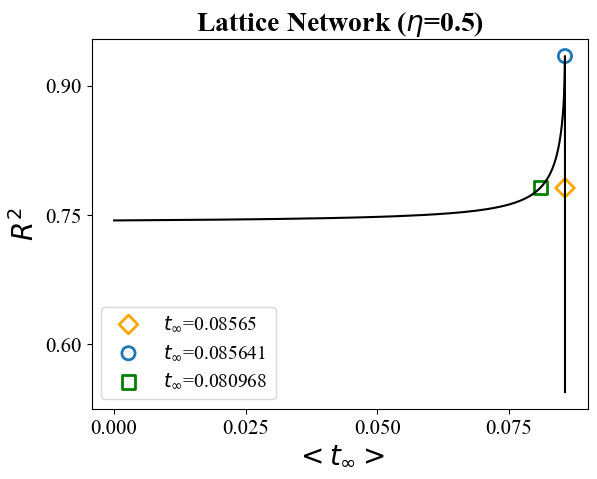

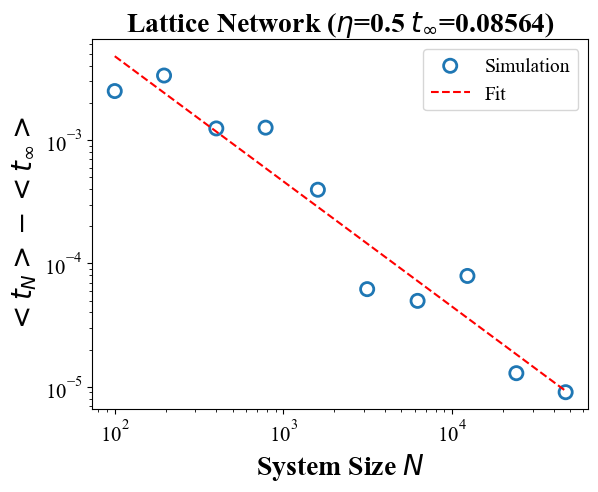

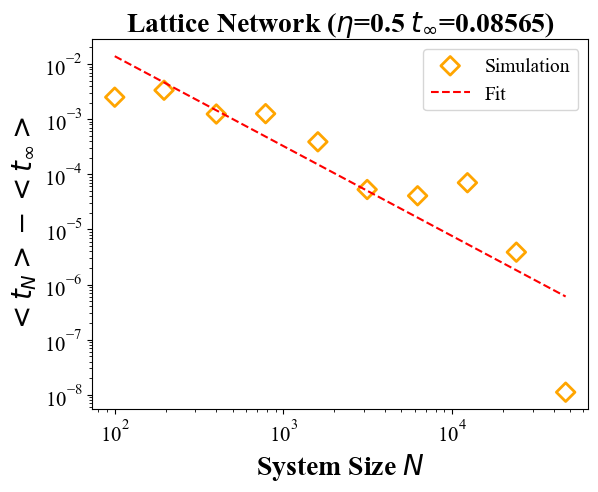

[0.01]


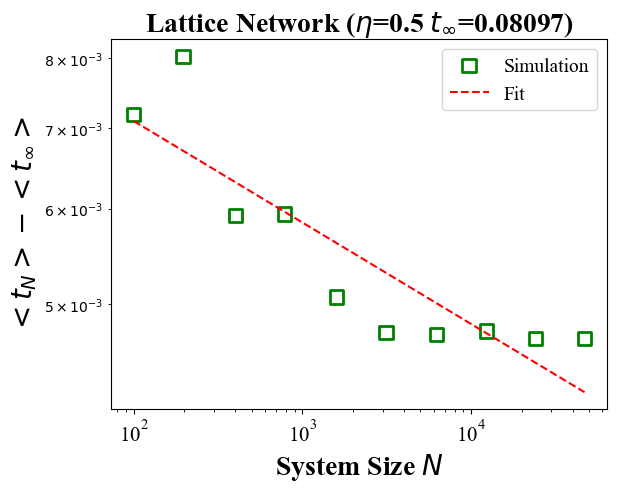

Lattice
power=1
Best: R^2=0.93
orange: R^2=0.83
green: R^2=0.83


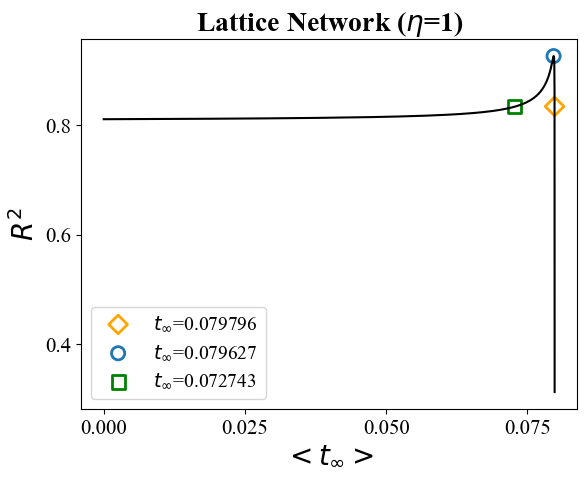

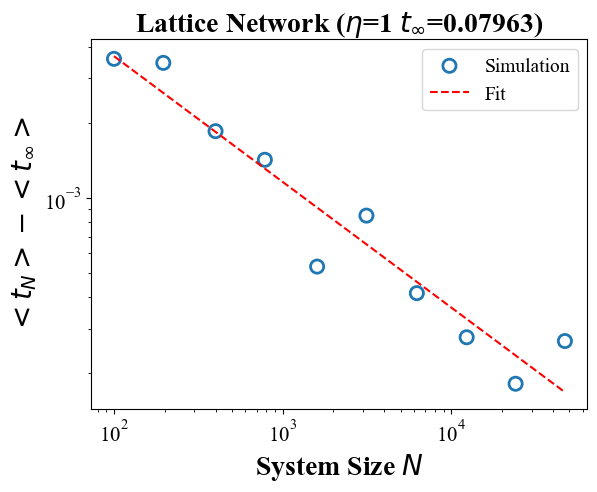

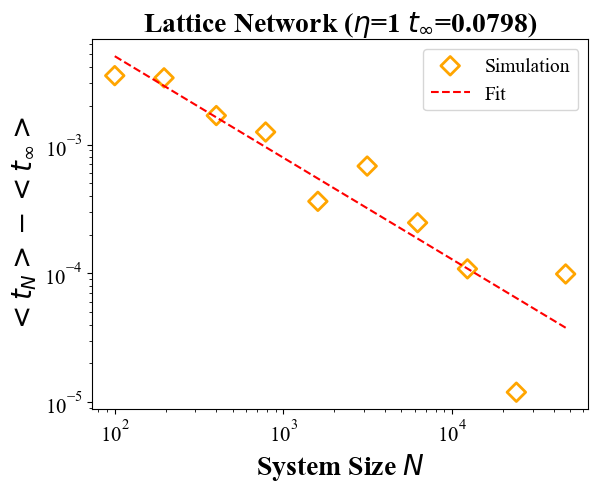

[0.01]


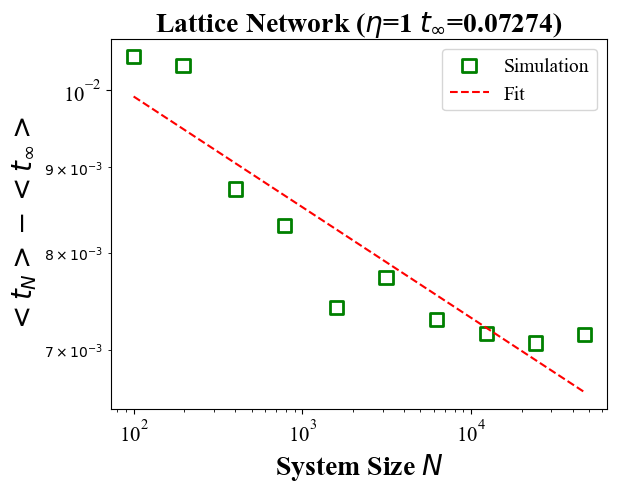

Lattice
power=2
Best: R^2=0.98
orange: R^2=0.83
green: R^2=0.83


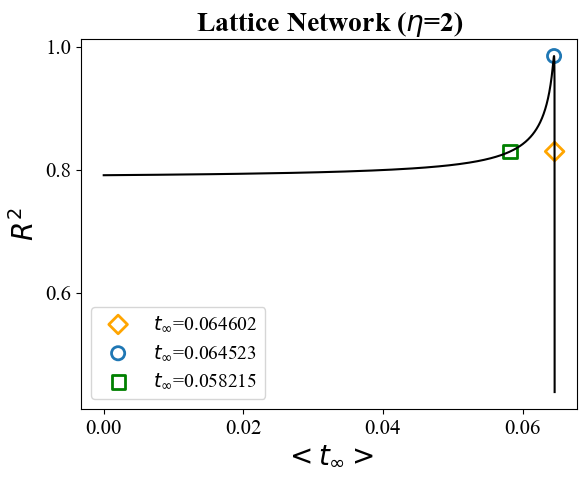

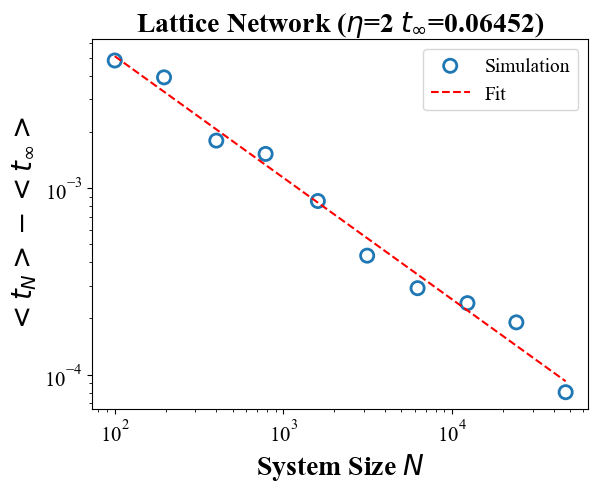

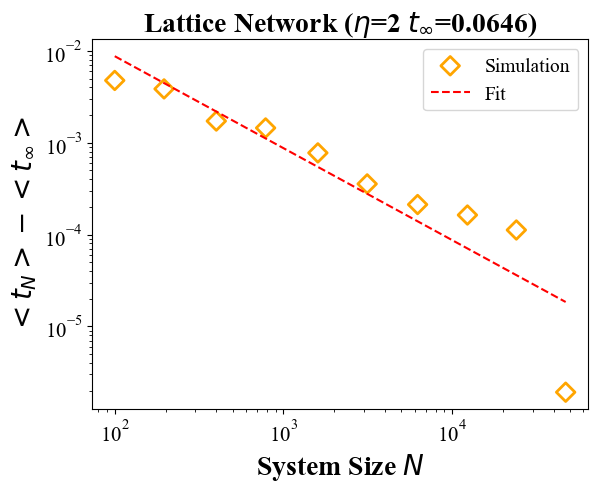

[0.01]


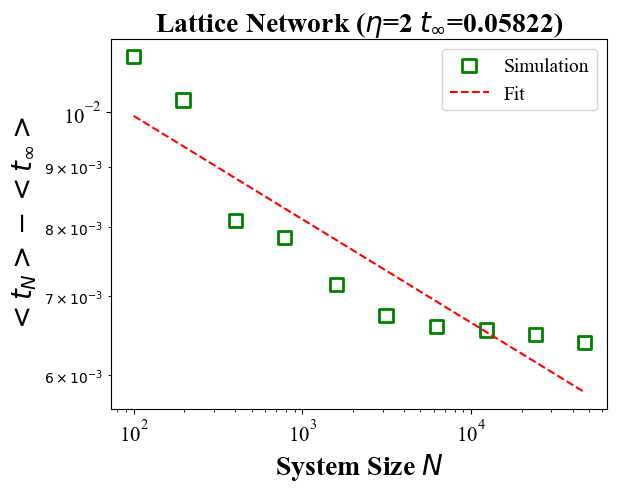

In [18]:
from matplotlib.ticker import LogLocator, MultipleLocator, MaxNLocator

net_name='Lattice'
net_name_show='Lattice Network'



power_list=[0.5,1,2]
phi=1
shape_parameter_for_coupling=2

line_width_marker_set=2
max_tick_num=4
dpi_set=1000
marker_blue,marker_green,marker_yellow='o','s','D'


line_width_marker_set=2
max_tick_num=4
for power in power_list:
    mean_list=[]
    std_list=[]
    for N in N_list:
        lifetime_data=[]
        file_name=net_name+'_N='+str(N)+'_'+'power='+str(power)+'_shape='+str(shape_parameter_for_coupling)+'_phi='+str(phi)+'.txt'

        f=open('./life_data/'+net_name+'/'+file_name,'r')
        line=f.readline()
        while(line!=''):
            lifetime_data.append(float(line))
            line=f.readline()
        f.close()
        lifetime_data=lifetime_data[:500]
        mean_list.append(np.mean(lifetime_data))
        std_list.append(np.std(lifetime_data))
    #获取 不同t_inf下对应的R^2
    def R2_cal(mean_limit):   
        x_list=np.log(N_list)
        y_list=np.log(mean_list-mean_limit)
        return (np.corrcoef(x_list, y_list)[0, 1])**2
    def object_func(mean_limit):
        return -R2_cal(mean_limit)
    def judge_R_diff(R_list,threshold):
        max_diff=0
        for i in range(len(R_list)-1):
            max_diff=max(max_diff,abs(R_list[i+1]-R_list[i]))
        return max_diff<threshold
    threshold=0.001
    mean_limit_list=np.min(mean_list)-10**(np.linspace(-13,np.log(np.min(mean_list))/np.log(10),10))
    R_list=[]
    for mean_limit in mean_limit_list:
        R_list.append(R2_cal(mean_limit))
    while (not judge_R_diff(R_list,threshold)):
        new_mean_limit_list=[mean_limit_list[0]]
        new_R_list=[R_list[0]]
        for index_mean in range(len(mean_limit_list)-1):
            if(np.abs(R_list[index_mean+1]-R_list[index_mean])>threshold):
                insert_mean_limit=(mean_limit_list[index_mean+1]+mean_limit_list[index_mean])/2
                insert_R=R2_cal(insert_mean_limit)
                new_mean_limit_list.append(insert_mean_limit)
                new_R_list.append(insert_R)
            new_mean_limit_list.append(mean_limit_list[index_mean+1])
            new_R_list.append(R_list[index_mean+1])
        mean_limit_list=new_mean_limit_list
        R_list=new_R_list
    best_mean_limit=mean_limit_list[np.argmax(R_list)]
    mean_limit_left_list=mean_limit_list[:np.argmax(R_list)]
    R_list_left_list=np.array(R_list[:np.argmax(R_list)])
    mean_limit_right_list=mean_limit_list[np.argmax(R_list):]
    R_list_right_list=np.array(R_list[np.argmax(R_list):])
    suboptimal_left=(0.2*np.max(R_list)+0.8*np.min(R_list_left_list))
    suboptimal_right=(0.2*np.max(R_list)+0.8*np.min(R_list_right_list))
    suboptimal=max(suboptimal_right,suboptimal_left)
    R_left=R_list_left_list[np.argmin(np.abs(R_list_left_list-suboptimal))]
    mean_limit_left=mean_limit_left_list[np.argmin(np.abs(R_list_left_list-suboptimal))]
    R_right=R_list_right_list[np.argmin(np.abs(R_list_right_list-suboptimal))]
    mean_limit_right=mean_limit_right_list[np.argmin(np.abs(R_list_right_list-suboptimal))]
    #draw the best t_infinity
    plt.plot(mean_limit_list,R_list,c='black',linestyle='-')
    
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=max_tick_num))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=max_tick_num))
    plt.xticks(fontproperties = 'Times New Roman', size = special_tick_size)
    plt.yticks(fontproperties = 'Times New Roman', size = special_tick_size)    
    print(net_name)
    print("power="+str(power))
    print("Best: R^2="+str(round(R_list[np.argmax(R_list)],2)))
    print("orange: R^2="+str(round(R_left,2)))
    print("green: R^2="+str(round(R_right,2)))
    plt.scatter(mean_limit_left,R_left,edgecolors='orange',marker=marker_yellow,linewidth=line_width_marker_set,facecolors='none',label=r'$t_{\infty}$='+str(round(mean_limit_left,6)),s=size_marker)
    plt.scatter(best_mean_limit,np.max(R_list),edgecolors='#1f77b4',marker=marker_blue,linewidth=line_width_marker_set,facecolors='none',label=r'$t_{\infty}$='+str(round(best_mean_limit,6)),s=size_marker)
    plt.scatter(mean_limit_right,R_right,edgecolors='green',marker=marker_green,linewidth=line_width_marker_set,facecolors='none',label=r'$t_{\infty}$='+str(round(mean_limit_right,6)),s=size_marker)
    plt.legend(loc='lower left',prop=legend_font)
    plt.ylabel(r"$R^2$",fontproperties=label_special_font)
    plt.xlabel(r"$<t_{\infty}>$",fontproperties=label_special_font)
    plt.title(net_name_show+" ("+character_power+"="+str(power)+")",fontproperties=label_special_font)
    file_save_name='Mean_R2_mean_'+net_name_show+" ("+"power="+str(power)+").svg"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()

    #The best fitting for the scaling law of mean lifetime
    plt.scatter(N_list,mean_list-best_mean_limit,linewidth=line_width_marker_set,edgecolors='#1f77b4',marker=marker_blue, facecolors='none',label='Simulation',s=size_marker)
    x_list=np.log(N_list)
    y_list=np.log(mean_list-best_mean_limit)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')

    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-best_mean_limit)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)
    
    
    plt.xticks(fontproperties = 'Times New Roman', size=special_tick_size)  # 设置x轴刻度字体大小为special_tick_size
    plt.yticks(fontproperties = 'Times New Roman', size=special_tick_size)  # 设置y轴刻度字体大小为special_tick_size
    
    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(net_name_show+" ("+character_power+"="+str(power)+" "r'$t_{\infty}$='+str(round(best_mean_limit,5))+")",fontproperties=label_special_font)
    plt.legend(prop=legend_font)
    file_save_name='Mean_best_'+net_name_show+" ("+"power="+str(power)+")"+".png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()

    plt.scatter(N_list,mean_list-mean_limit_left,linewidth=line_width_marker_set,edgecolors='orange',marker=marker_yellow, facecolors='none',label='Simulation',s=size_marker)
    x_list=np.log(N_list)
    y_list=np.log(mean_list-mean_limit_left)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    # 计算回归线上的预测值
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')
    
    
    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-mean_limit_left)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)  
    plt.xticks(fontproperties = 'Times New Roman', size=special_tick_size)  # 设置x轴刻度字体大小为special_tick_size
    plt.yticks(fontproperties = 'Times New Roman', size=special_tick_size)  # 设置y轴刻度字体大小为special_tick_size

    
    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(net_name_show+" ("+character_power+"="+str(power)+" "r'$t_{\infty}$='+str(round(mean_limit_left,5))+")",fontproperties=label_special_font)
    plt.legend(prop=legend_font)
    file_save_name='Mean_rightBad_'+net_name_show+" ("+"power="+str(power)+")"+"R^2="+str(round(r_value**2,4))+".png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()

        #Fitting for the scaling law of mean lifetime when choosing suboptimal t_infinity (right suboptimal)
    plt.scatter(N_list,mean_list-mean_limit_right,linewidth=line_width_marker_set,edgecolors='green',marker=marker_green, facecolors='none',label='Simulation',s=size_marker)
    x_list=np.log(N_list)
    y_list=np.log(mean_list-mean_limit_right)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    # 计算回归线上的预测值
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')


    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-mean_limit_right)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)
    print(yticks)
    
    
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

    plt.xticks(fontproperties = 'Times New Roman', size = special_tick_size)
    plt.yticks(fontproperties = 'Times New Roman', size = special_tick_size)

    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(net_name_show+" ("+character_power+"="+str(power)+" "r'$t_{\infty}$='+str(round(mean_limit_right,5))+")",fontproperties=label_special_font)

    plt.legend(prop=legend_font)
    file_save_name='Mean_leftBad_'+net_name_show+" ("+"power="+str(power)+")"+"R^2="+str(round(r_value**2,4))+".png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()



orange: 0.7814
green: 0.7814


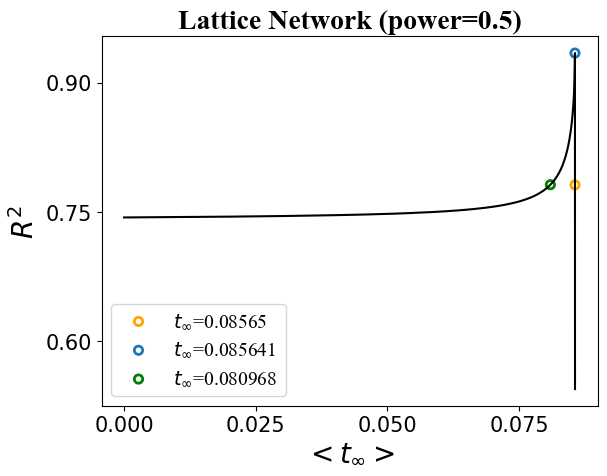

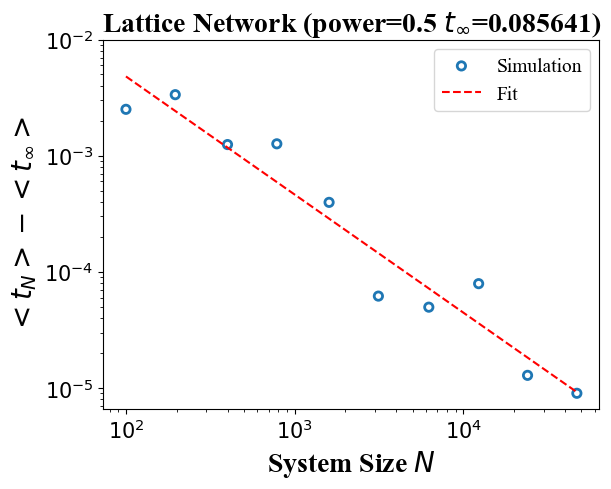

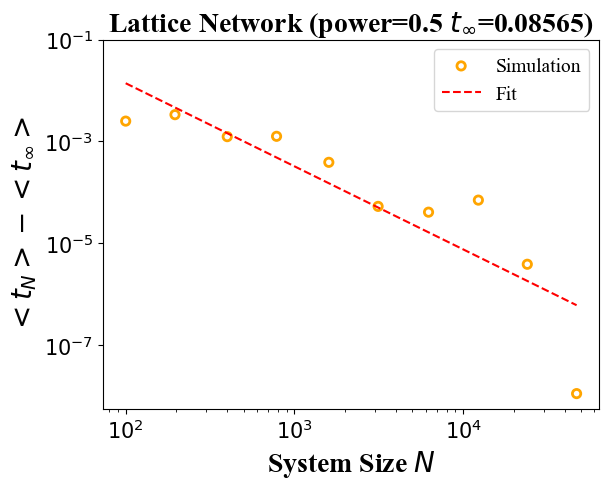

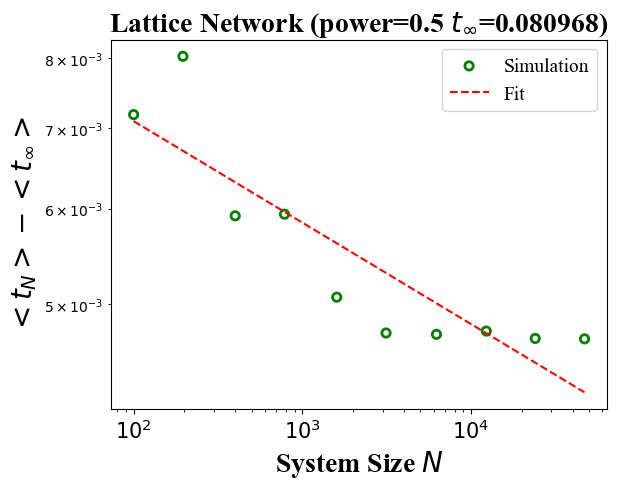

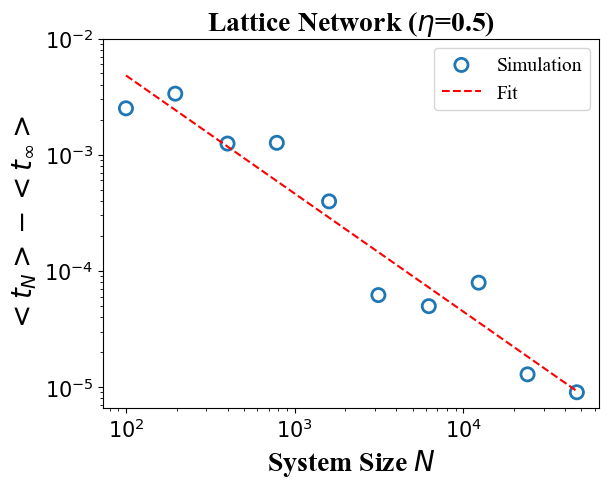

begin saving
slope:: -1.0164227053190868
intercept:-0.6562164359930298
r_value : -0.966593901405504
p-value : 5.233159753574923e-06


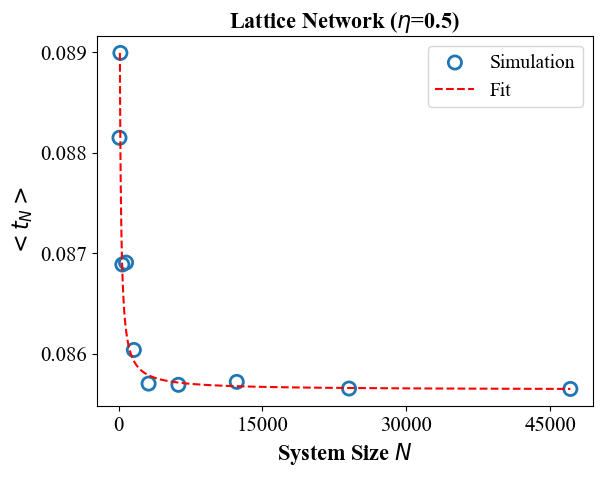

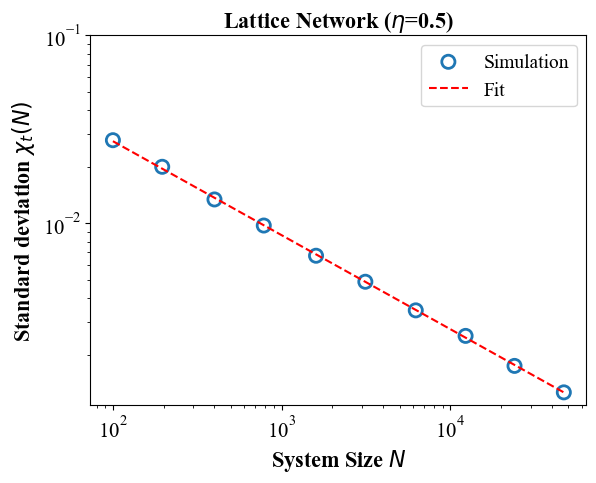

slope:: -0.5
intercept:-1.2961947097583923
r_value : -0.9998973588448958
p-value : 4.85523983873423e-16


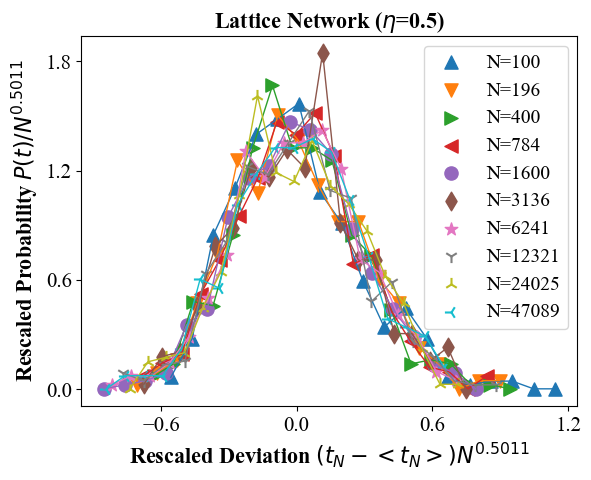

power=0.5
c1=0.5188 delta=-1.0164 alpha=0.5011


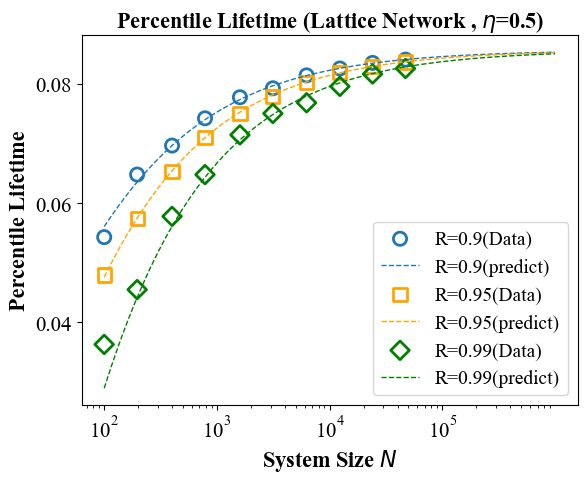

orange: 0.8344
green: 0.8344


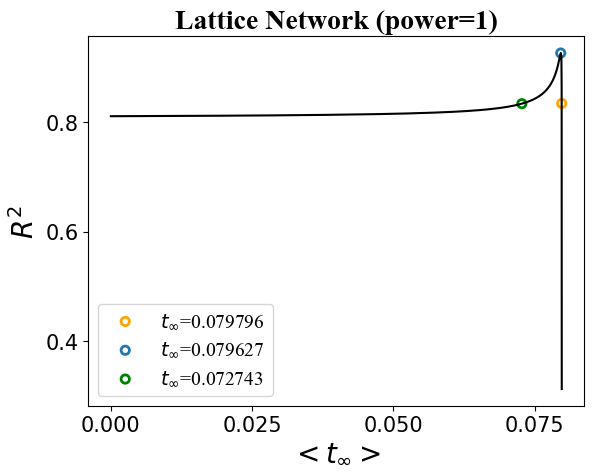

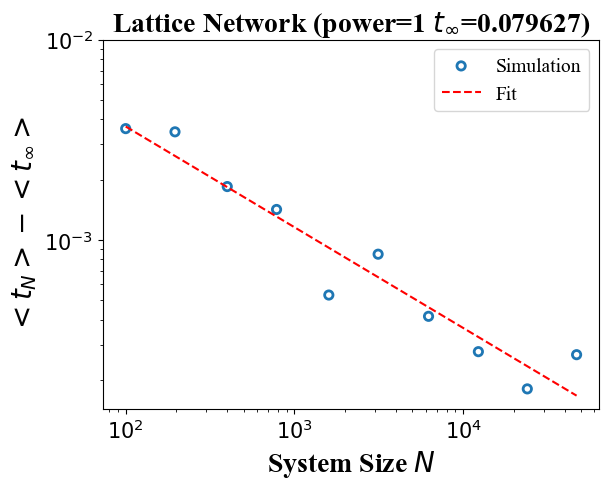

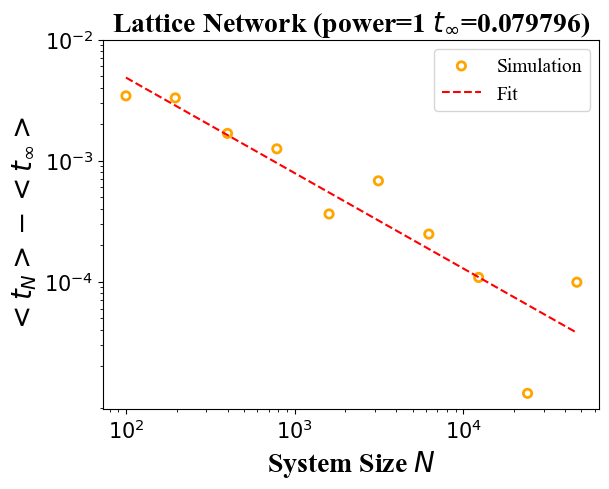

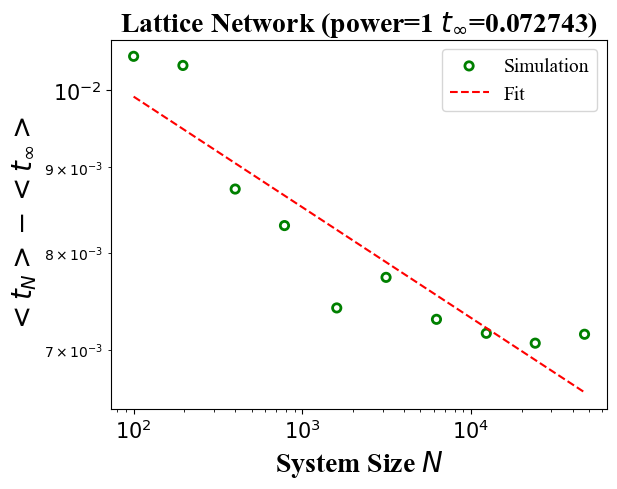

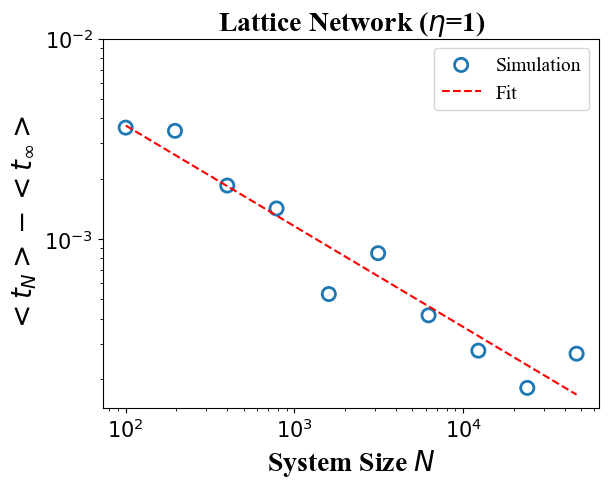

begin saving
slope:: -0.5023511825328664
intercept:-3.2908685736895134
r_value : -0.9625013336901084
p-value : 8.267293261955856e-06


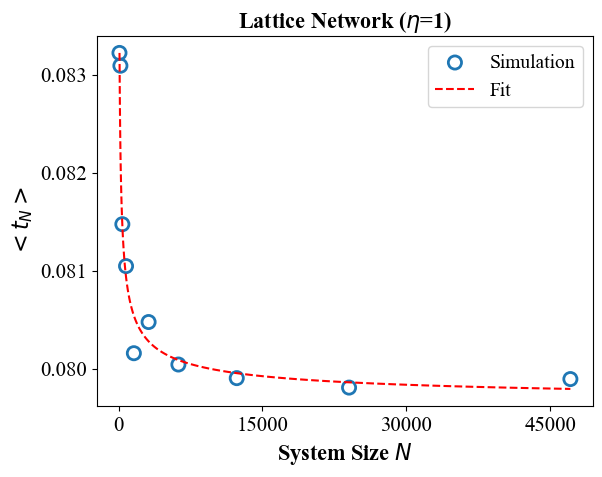

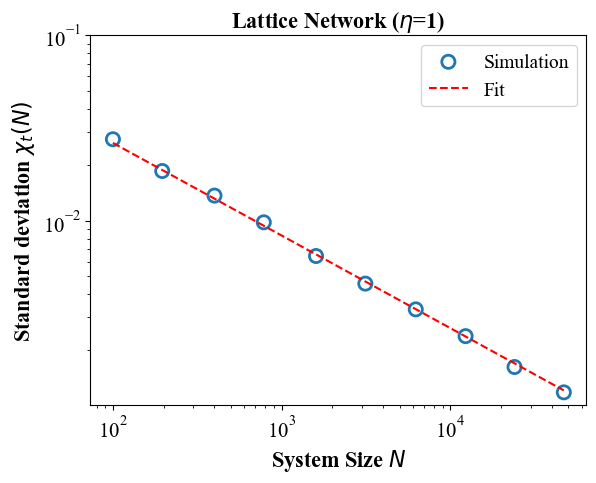

slope:: -0.5
intercept:-1.3369310938827574
r_value : -0.9997435427811276
p-value : 1.89192584795481e-14


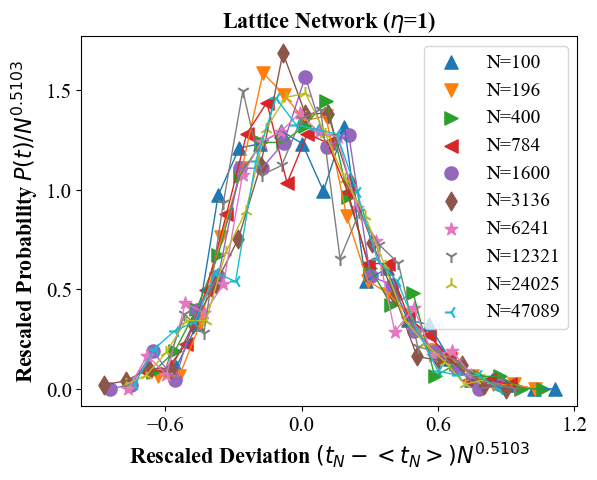

power=1
c1=0.0372 delta=-0.5024 alpha=0.5103


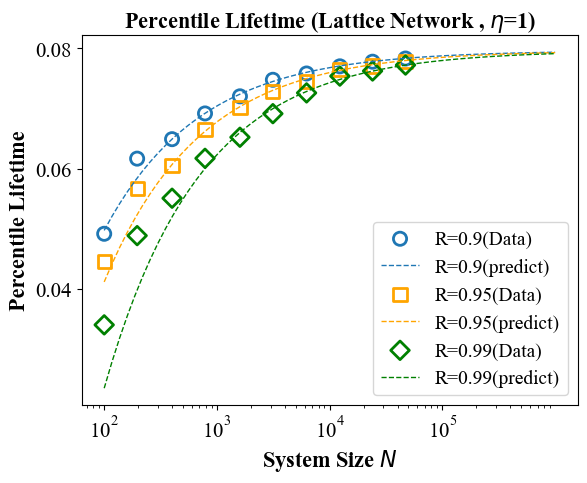

orange: 0.8297
green: 0.8297


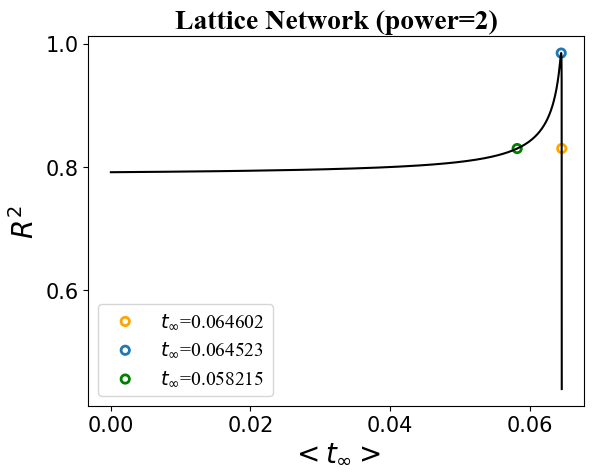

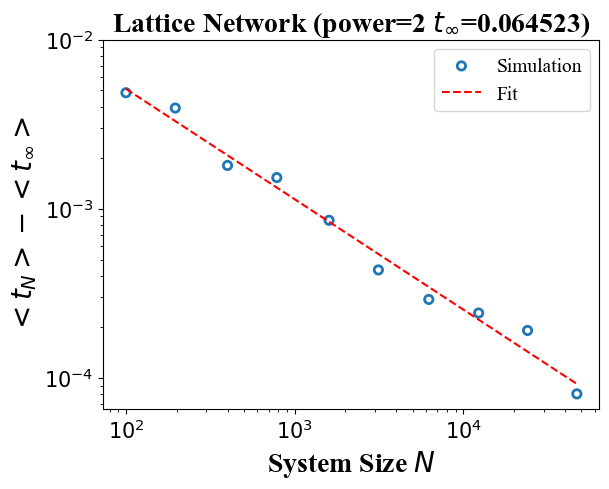

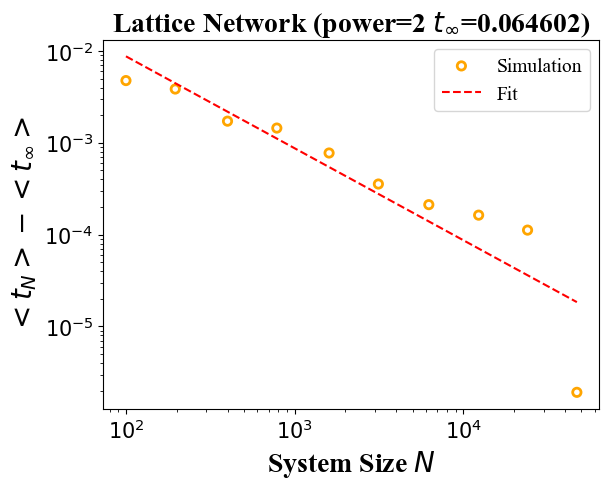

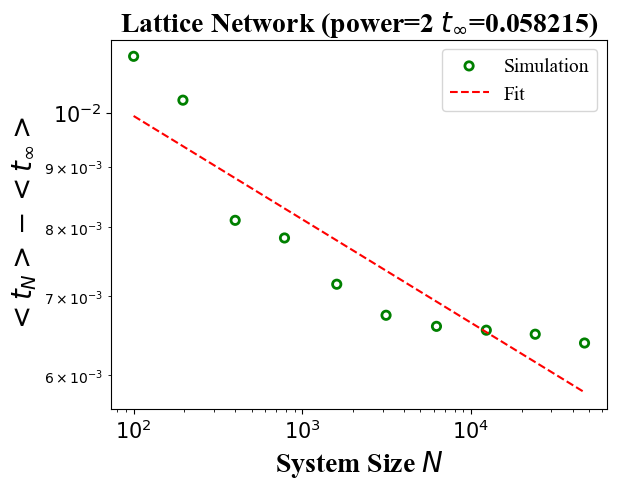

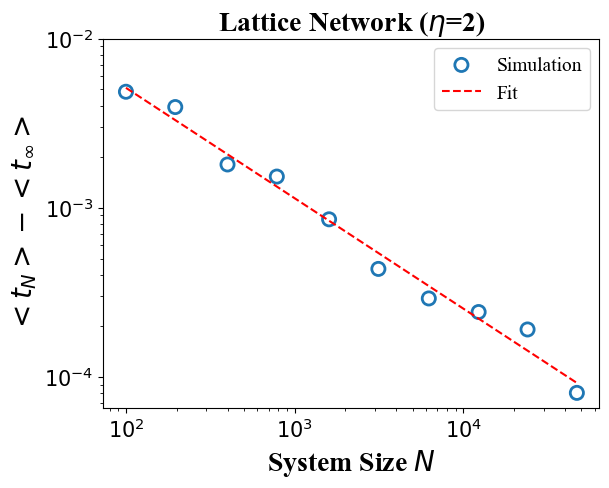

begin saving
slope:: -0.6525506185143994
intercept:-2.2713803785984927
r_value : -0.9922947092606114
p-value : 1.5279630723846193e-08


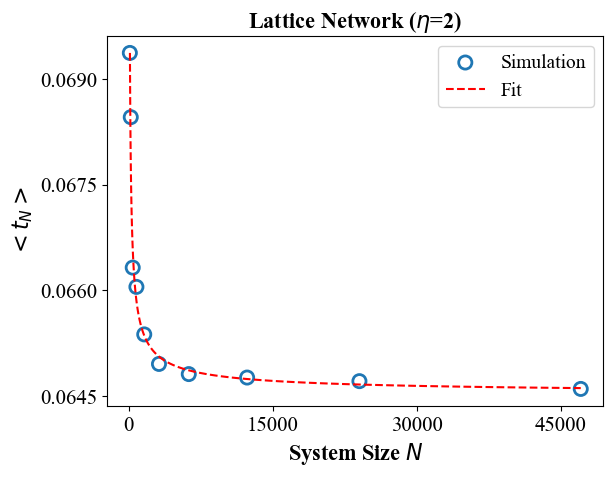

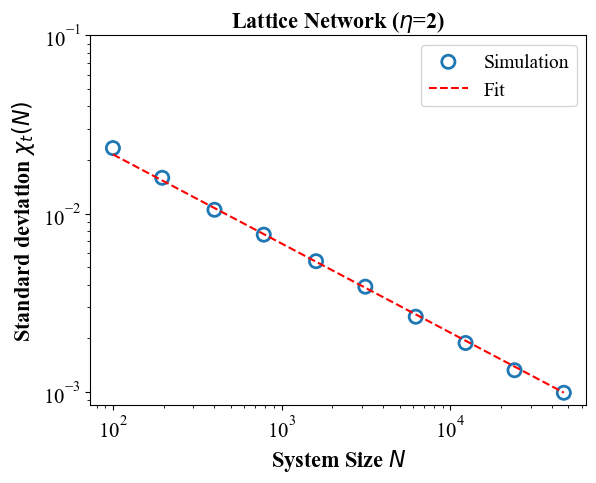

slope:: -0.5
intercept:-1.5376846355955411
r_value : -0.9996830660291306
p-value : 4.412533792465394e-14


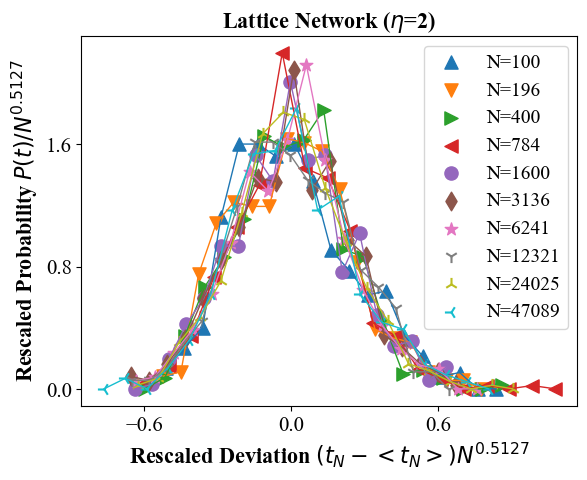

power=2
c1=0.1032 delta=-0.6526 alpha=0.5127


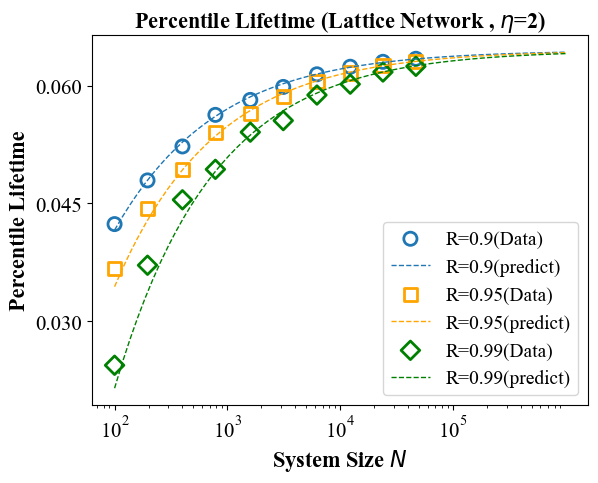

In [19]:
from matplotlib.ticker import LogLocator, MultipleLocator, MaxNLocator

net_name='Lattice'
net_name_show='Lattice Network'

power_list=[0.5,1,2]
phi=1
shape_parameter_for_coupling=2

for power in power_list:
    mean_list=[]
    std_list=[]
    for N in N_list:
        lifetime_data=[]
        file_name=net_name+'_N='+str(N)+'_'+'power='+str(power)+'_shape='+str(shape_parameter_for_coupling)+'_phi='+str(phi)+'.txt'

        f=open('./life_data/'+net_name+'/'+file_name,'r')
        line=f.readline()
        while(line!=''):
            lifetime_data.append(float(line))
            line=f.readline()
        f.close()
        lifetime_data=lifetime_data[:500]
        mean_list.append(np.mean(lifetime_data))
        std_list.append(np.std(lifetime_data))
    #calculate R2 when t_infinity achieve different values.
    def R2_cal(mean_limit):   
        x_list=np.log(N_list)
        y_list=np.log(mean_list-mean_limit)
        return (np.corrcoef(x_list, y_list)[0, 1])**2
    def object_func(mean_limit):
        return -R2_cal(mean_limit)
    def judge_R_diff(R_list,threshold):
        max_diff=0
        for i in range(len(R_list)-1):
            max_diff=max(max_diff,abs(R_list[i+1]-R_list[i]))
        return max_diff<threshold
    threshold=0.001
    mean_limit_list=np.min(mean_list)-10**(np.linspace(-13,np.log(np.min(mean_list))/np.log(10),10))
    R_list=[]
    for mean_limit in mean_limit_list:
        R_list.append(R2_cal(mean_limit))
    while (not judge_R_diff(R_list,threshold)):
        new_mean_limit_list=[mean_limit_list[0]]
        new_R_list=[R_list[0]]
        for index_mean in range(len(mean_limit_list)-1):
            if(np.abs(R_list[index_mean+1]-R_list[index_mean])>threshold):
                insert_mean_limit=(mean_limit_list[index_mean+1]+mean_limit_list[index_mean])/2
                insert_R=R2_cal(insert_mean_limit)
                new_mean_limit_list.append(insert_mean_limit)
                new_R_list.append(insert_R)
            new_mean_limit_list.append(mean_limit_list[index_mean+1])
            new_R_list.append(R_list[index_mean+1])
        mean_limit_list=new_mean_limit_list
        R_list=new_R_list
    best_mean_limit=mean_limit_list[np.argmax(R_list)]
    mean_limit_left_list=mean_limit_list[:np.argmax(R_list)]
    R_list_left_list=np.array(R_list[:np.argmax(R_list)])
    mean_limit_right_list=mean_limit_list[np.argmax(R_list):]
    R_list_right_list=np.array(R_list[np.argmax(R_list):])
    suboptimal_left=(0.2*np.max(R_list)+0.8*np.min(R_list_left_list))
    suboptimal_right=(0.2*np.max(R_list)+0.8*np.min(R_list_right_list))
    suboptimal=max(suboptimal_right,suboptimal_left)
    R_left=R_list_left_list[np.argmin(np.abs(R_list_left_list-suboptimal))]
    mean_limit_left=mean_limit_left_list[np.argmin(np.abs(R_list_left_list-suboptimal))]
    R_right=R_list_right_list[np.argmin(np.abs(R_list_right_list-suboptimal))]
    mean_limit_right=mean_limit_right_list[np.argmin(np.abs(R_list_right_list-suboptimal))]
    
    #draw the best t_infinity
    plt.plot(mean_limit_list,R_list,c='black',linestyle='-')
    
    
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=max_tick_num))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=max_tick_num))
    ax = plt.gca()
    ax.tick_params(axis='x', labelsize=special_tick_size)  
    ax.tick_params(axis='y', labelsize=special_tick_size) 
    
    print("orange: "+str(round(R_left,4)))
    print("green: "+str(round(R_left,4)))
    plt.scatter(mean_limit_left,R_left,edgecolors='orange',linewidth=line_width_marker_set,facecolors='none',label=r'$t_{\infty}$='+str(round(mean_limit_left,6)))
    plt.scatter(best_mean_limit,np.max(R_list),edgecolors='#1f77b4',linewidth=line_width_marker_set,facecolors='none',label=r'$t_{\infty}$='+str(round(best_mean_limit,6)))
    plt.scatter(mean_limit_right,R_right,edgecolors='green',linewidth=line_width_marker_set,facecolors='none',label=r'$t_{\infty}$='+str(round(mean_limit_right,6)))
    plt.legend(loc='lower left',prop=legend_font)
    plt.ylabel(r"$R^2$",fontproperties=label_special_font)
    plt.xlabel(r"$<t_{\infty}>$",fontproperties=label_special_font)
    plt.title(net_name_show+" ("+"power="+str(power)+")",fontproperties=label_special_font)
    file_save_name='Mean_R2_mean_'+net_name_show+" ("+"power="+str(power)+").svg"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()

    #The best fitting for the scaling law of mean lifetime
    plt.scatter(N_list,mean_list-best_mean_limit,marker='o',linewidth=line_width_marker_set,edgecolors='#1f77b4', facecolors='none',label='Simulation')
    x_list=np.log(N_list)
    y_list=np.log(mean_list-best_mean_limit)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    #plt.title(net_name_show+" ("+"power="+str(power)+")",fontproperties=label_font)
    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-best_mean_limit)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)   
    ax = plt.gca()
    ax.tick_params(axis='x', labelsize=special_tick_size) 
    ax.tick_params(axis='y', labelsize=special_tick_size) 
    
    plt.title(net_name_show+" ("+"power="+str(power)+" "r'$t_{\infty}$='+str(round(best_mean_limit,6))+")",fontproperties=label_special_font)
    plt.legend(prop=legend_font)
    file_save_name='Mean_best_'+net_name_show+" ("+"power="+str(power)+")"+".png"
    #plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()

    #Fitting for the scaling law of mean lifetime when choosing suboptimal t_infinity (left suboptimal)
    plt.scatter(N_list,mean_list-mean_limit_left,marker='o',linewidth=line_width_marker_set,edgecolors='orange', facecolors='none',label='Simulation')
    x_list=np.log(N_list)
    y_list=np.log(mean_list-mean_limit_left)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')
    plt.xscale('log')
    plt.yscale('log')
    
    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-mean_limit_left)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)  
    ax = plt.gca()
    ax.tick_params(axis='x', labelsize=special_tick_size)  # 设置x轴刻度字体大小为special_tick_size
    ax.tick_params(axis='y', labelsize=special_tick_size)  # 设置y轴刻度字体大小为special_tick_size


    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    #plt.title(net_name_show+" ("+"power="+str(power)+")",fontproperties=label_font)
    plt.title(net_name_show+" ("+"power="+str(power)+" "r'$t_{\infty}$='+str(round(mean_limit_left,6))+")",fontproperties=label_special_font)
    plt.legend(prop=legend_font)
    file_save_name='Mean_rightBad_'+net_name_show+" ("+"power="+str(power)+")"+"R^2="+str(round(r_value,4))+".png"
    #plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()

    #Fitting for the scaling law of mean lifetime when choosing suboptimal t_infinity (right suboptimal)
    plt.scatter(N_list,mean_list-mean_limit_right,marker='o',linewidth=line_width_marker_set,edgecolors='green', facecolors='none',label='Simulation')
    x_list=np.log(N_list)
    y_list=np.log(mean_list-mean_limit_right)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')
    plt.xscale('log')
    plt.yscale('log')
    ax = plt.gca()
    ax.tick_params(axis='x', labelsize=special_tick_size) 
    ax.tick_params(axis='y', labelsize=special_tick_size) 

    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-mean_limit_right)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)
    
    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    plt.title(net_name_show+" ("+"power="+str(power)+" "r'$t_{\infty}$='+str(round(mean_limit_right,6))+")",fontproperties=label_special_font)

    plt.legend(prop=legend_font)
    file_save_name='Mean_leftBad_'+net_name_show+" ("+"power="+str(power)+")"+"R^2="+str(round(r_value,4))+".png"
    #plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()
    
    plt.scatter(N_list,mean_list-best_mean_limit,marker='o',linewidth=line_width_marker_set,edgecolors='#1f77b4', facecolors='none',label='Simulation',s=size_marker)
    x_list=np.log(N_list)
    y_list=np.log(mean_list-best_mean_limit)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')
    
    plt.xscale('log')
    plt.yscale('log')
    ax = plt.gca()
    ax.tick_params(axis='x', labelsize=special_tick_size)  
    ax.tick_params(axis='y', labelsize=special_tick_size)

    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-best_mean_limit)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)   
    
    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    plt.title(net_name_show+" ("+character_power+"="+str(power)+")",fontproperties=label_special_font)
    plt.legend(prop=legend_font)
    file_save_name='Mean_loglog_'+net_name_show+" ("+"power="+str(power)+")"+".png"
    
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')

    plt.show()
    
    print("begin saving")
    t_inf=best_mean_limit.copy()
    delta=slope.copy()
    c1=np.exp(intercept)
    
    print(f'slope:: {slope}')
    print(f'intercept:{intercept}')
    print(f'r_value : {r_value}')
    print(f'p-value : {p_value}')
    
    
    x_min_to_show=(np.log(np.max(mean_list)-best_mean_limit)-intercept)/slope
    x_list_to_show=np.linspace(x_min_to_show,np.log(np.max(N_list)),100)
    plt.scatter(N_list,mean_list,linewidth=line_width_marker_set,edgecolors='#1f77b4', facecolors='none',label='Simulation',s=size_marker)
    regression_line_toshow = slope * x_list_to_show + intercept
    plt.plot(np.exp(x_list_to_show), np.exp(regression_line_toshow)+best_mean_limit, color='red', label='Fit',linestyle='--')
    plt.xlabel("System Size "+r"$N$",fontproperties=label_font)
    plt.ylabel(r"$<t_N>$",fontproperties=label_font)
    
    #y_to_show=np.linspace(np.min(mean_list),np.max(mean_list),3)
    #plt.yticks(y_to_show)    
    
    plt.xticks(fontproperties = 'Times New Roman', size = special_tick_size)
    plt.yticks(fontproperties = 'Times New Roman', size = special_tick_size)
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=4))
    
    plt.title(net_name_show+" ("+character_power+"="+str(power)+")",fontproperties=label_font)
    plt.legend(prop=legend_font)
    file_save_name='Mean_allFit_'+net_name_show+" ("+"power="+str(power)+").png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()
    
    
    #Scaling law of standard deviation
    plt.scatter(N_list,std_list,linewidth=line_width_marker_set,edgecolors='#1f77b4', facecolors='none',label='Simulation',s=size_marker)
    x_list=np.log(N_list)
    y_list=np.log(std_list)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    alpha=copy.deepcopy(slope) 
    slope=-0.5 # draw the straight line of slope 1/2
    intercept=np.mean(y_list)-np.mean(x_list)*slope
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')
    plt.xscale('log')
    plt.yscale('log')
    
    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(std_list)/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)   

    
    plt.xlabel("System Size "+r"$N$",fontproperties=label_font)
    plt.ylabel(r"Standard deviation $\chi_t(N)$",fontproperties=label_font)
    plt.title(net_name_show+" ("+character_power+"="+str(power)+")",fontproperties=label_font)
    plt.legend(prop=legend_font)
    plt.xticks(fontproperties = 'Times New Roman', size = special_tick_size)
    plt.yticks(fontproperties = 'Times New Roman', size = special_tick_size)
    file_save_name='std_'+net_name_show+" ("+"power="+str(power)+")"+".png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()
    print(f'slope:: {slope}')
    print(f'intercept:{intercept}')
    print(f'r_value : {r_value}')
    print(f'p-value : {p_value}')

    
    #calculate the universal function g by rescaling lifetime data
    marker_list=['^','v','>','<','o','d','*','1','2','3','4','+','x','|','_']
    for index_N in range(len(N_list)):
        N=N_list[index_N]
        density_marker=marker_list[index_N]
        lifetime_data=[]
        file_name=net_name+'_N='+str(N)+'_'+'power='+str(power)+'_shape='+str(shape_parameter_for_coupling)+'_phi='+str(phi)+'.txt'

        f=open('./life_data/'+net_name+'/'+file_name,'r')
        line=f.readline()
        while(line!=''):
            lifetime_data.append(float(line))
            line=f.readline()
        f.close()
        lifetime_data=lifetime_data[:500]
        min_life=np.min(lifetime_data)
        max_life=np.max(lifetime_data)
        cut_list=np.linspace(min_life,max_life,20)
        mid_list=[]
        distri_value_list=[]
        for index_cut in range(len(cut_list)-1):
            down=cut_list[index_cut]
            up=cut_list[index_cut+1]
            mid_list.append(((up+down)/2))
            distri_value_list.append(np.sum((lifetime_data>down)&(lifetime_data<up))/(len(lifetime_data)*(up-down)))
        distri_value_list=np.array(distri_value_list)
        mid_list=np.array(mid_list)
        plt.scatter((mid_list-np.mean(lifetime_data))/N**alpha,distri_value_list*N**alpha,marker=density_marker,label='N='+str(N),s=size_marker)
        plt.plot((mid_list-np.mean(lifetime_data))/N**alpha,distri_value_list*N**alpha,linewidth=1)
    plt.legend(prop=legend_font)
    plt.xlabel("Rescaled Deviation "+r"$(t_N-<t_N>)$"+r'$N^{{{}}}$'.format(round(-alpha,4)),fontproperties=label_font)
    plt.ylabel("Rescaled Probability "+r"$P(t)/$"+r'$N^{{{}}}$'.format(round(-alpha,4)),fontproperties=label_font)
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=4))
    
    plt.xticks(fontproperties = 'Times New Roman', size = special_tick_size)
    plt.yticks(fontproperties = 'Times New Roman', size = special_tick_size)

    plt.title(net_name_show+" ("+character_power+"="+str(power)+")",fontproperties=label_font)
    file_save_name='unifuc_'+net_name_show+" ("+"power="+str(power)+")"+".png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()
    

    
    
    #rescaled universal distribution, which correspond to g(delta t)
    all_scaled_samples=[]
    mean_list=[]
    for N in N_list:
        lifetime_data=[]
        file_name=net_name+'_N='+str(N)+'_'+'power='+str(power)+'_shape='+str(shape_parameter_for_coupling)+'_phi='+str(phi)+'.txt'
        f=open('./life_data/'+net_name+'/'+file_name,'r')
        line=f.readline()
        while(line!=''):
            lifetime_data.append(float(line))
            line=f.readline()
        f.close()
        lifetime_data=lifetime_data[:500]
        mean_list.append(np.mean(lifetime_data))
        lifetime_data=np.array(lifetime_data)-np.mean(lifetime_data)
        lifetime_data=lifetime_data*N**(-alpha)
        all_scaled_samples+=list(lifetime_data)


    #1. calculate quantile  from rescaled universal distribution
    Reliability_list=np.linspace(0.99,0.01,99)
    Reliability_list=np.arange(0.995,0.001,-0.001)

    kappa_list=[] # Quantile corresponding to different reliablity
    all_scaled_samples.sort()
    for Reliability in Reliability_list:
        rank=int((1-Reliability)*len(all_scaled_samples))
        kappa_list.append(all_scaled_samples[rank])
    #2. calculate quantile at given system size N
    N_test_list=[100,200,500,1000,10000,100000]
    for N in N_test_list:
        t_frac=best_mean_limit+np.array(kappa_list)*N**(alpha)+c1*N**delta
        t_frac=[0]+list(t_frac)
        Reliability_show_list=[1]+list(Reliability_list)
        plt.plot(t_frac,Reliability_show_list,label='N='+str(N))
    plt.plot([0,0.12],[0.95,0.95], color='black', linestyle='--',label='R=0.95')
    plt.legend(prop=legend_font)
    plt.ylabel("Reliability",fontproperties=label_font)
    plt.xlabel("Time",fontproperties=label_font)
    plt.title("Predict Reliability "+"("+net_name_show+" , "+character_power+"="+str(power)+")",fontproperties=label_font)
    #file_save_name="PredictReliability_"+net_name_show+"_power="+str(power)+".png"
    #plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.close()
    print("power="+str(power))    
    print('c1='+str(round(c1,4))+' delta='+str(round(delta,4))+' alpha='+str(round(-alpha,4)))
    
    
    # Predicting percentile lifetime
    Reliability_test_list=[0.9,0.95,0.99] # Demonstrate percentile lifetime corresponding when reliability is 0.9,0.95,0.99
    marker_list_known=['o','s','D']
    color_list=['#1f77b4','orange','green']
    for index_R in range(len(Reliability_test_list)):
        #1.empirical distribution
        color=color_list[index_R]
        Reliability=Reliability_test_list[index_R]
        marker_known=marker_list_known[index_R]
        t_critical_empirical=[]
        for N in N_list:
            lifetime_data=[]
            file_name=net_name+'_N='+str(N)+'_'+'power='+str(power)+'_shape='+str(shape_parameter_for_coupling)+'_phi='+str(phi)+'.txt'
            f=open('./life_data/'+net_name+'/'+file_name,'r')
            line=f.readline()
            while(line!=''):
                lifetime_data.append(float(line))
                line=f.readline()
            f.close()
            lifetime_data.sort()
            rank=int((1-Reliability)*len(lifetime_data))
            t_critical_empirical.append(lifetime_data[rank])
        plt.scatter(N_list,t_critical_empirical,label='R='+str(Reliability)+"(Data)",marker=marker_known,linewidth=line_width_marker_set,edgecolors=color, facecolors='none',s=size_marker)
        #2. predict distribution based on the universal function (charactered by quantile)
        N_test=np.logspace(start=2, stop=6, num=60)
        rank=int((1-Reliability)*len(all_scaled_samples))
        kappa=all_scaled_samples[rank]
        t_critical_predict=best_mean_limit+kappa*N_test**alpha+c1*N_test**delta
        plt.plot(N_test,t_critical_predict,linewidth=1,label='R='+str(Reliability)+"(predict)",c=color,linestyle='--')
        #plt.scatter(x, y, s=100, edgecolors='b', facecolors='none', marker='o')

    plt.xscale('log')    
    value_list=np.log(N_test)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)    
    plt.xlabel("System Size "+r"$N$",fontproperties=label_font)
    plt.ylabel("Percentile Lifetime",fontproperties=label_font)

    plt.xticks(fontproperties = 'Times New Roman', size = special_tick_size)
    plt.yticks(fontproperties = 'Times New Roman', size = special_tick_size)

    plt.legend(prop=legend_font)
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
    
    plt.title("Percentile Lifetime"+" ("+net_name_show+" , "+character_power+"="+str(power)+")",fontproperties=label_font)
    file_save_name="ReliabilityLifetime_"+net_name_show+"_power="+str(power)+".png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()

# BA

BA
power=0.5
Best: R^2=0.86
orange: R^2=0.68
green: R^2=0.68


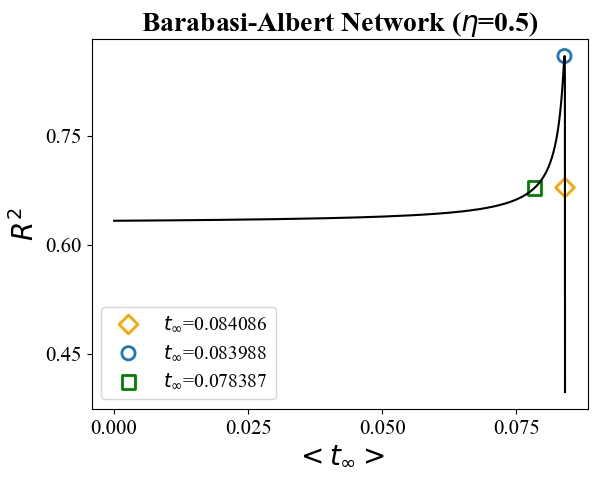

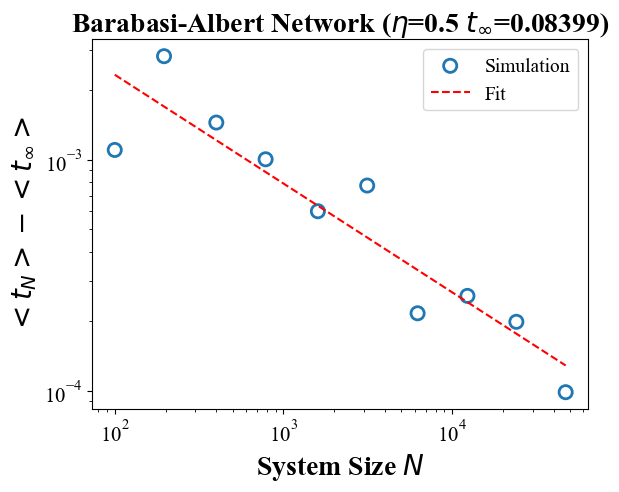

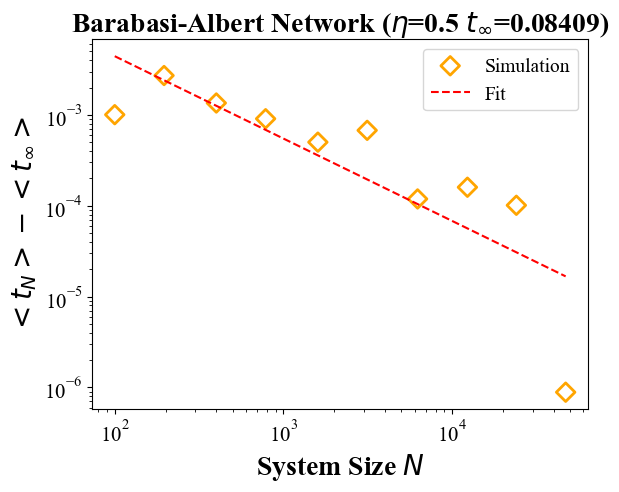

[0.01]


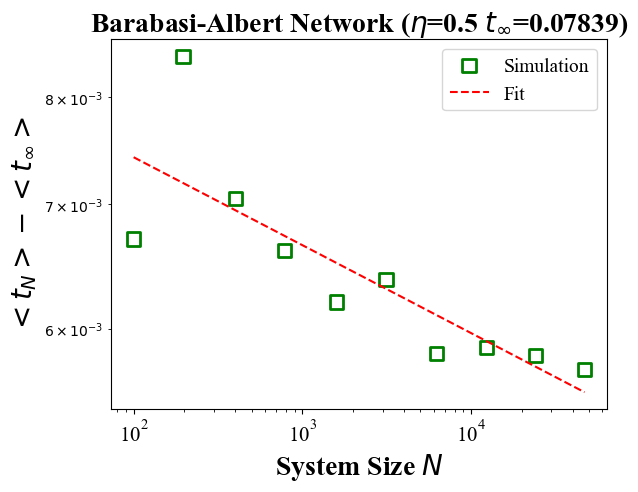

BA
power=1
Best: R^2=0.97
orange: R^2=0.86
green: R^2=0.86


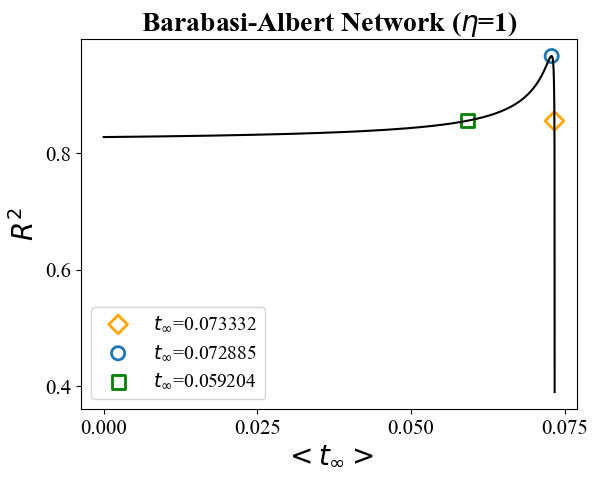

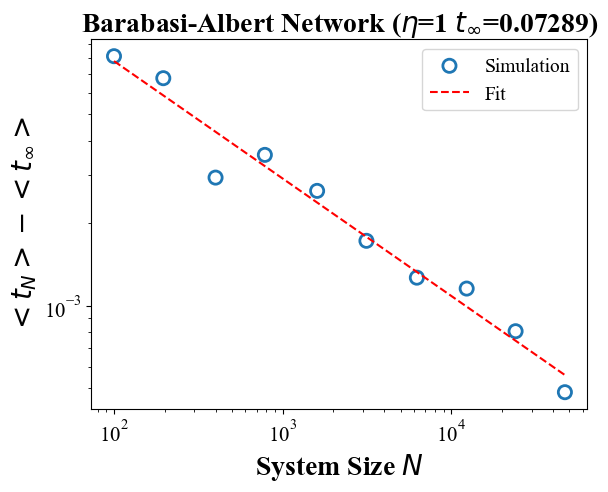

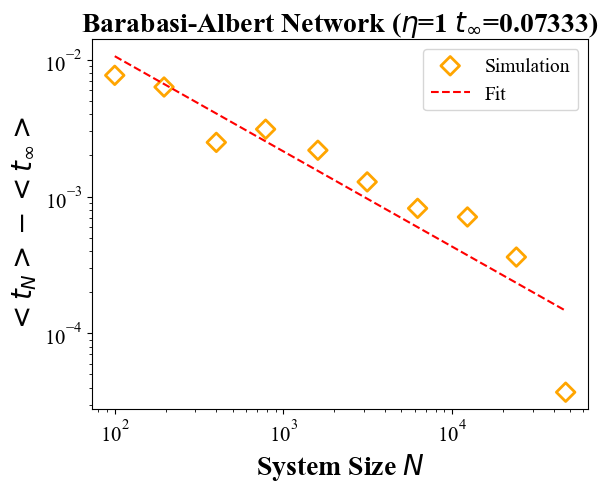

[0.1]


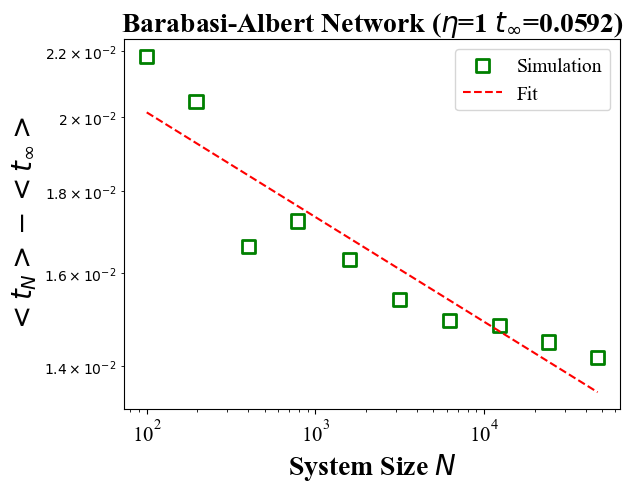

BA
power=2
Best: R^2=1.0
orange: R^2=0.93
green: R^2=0.93


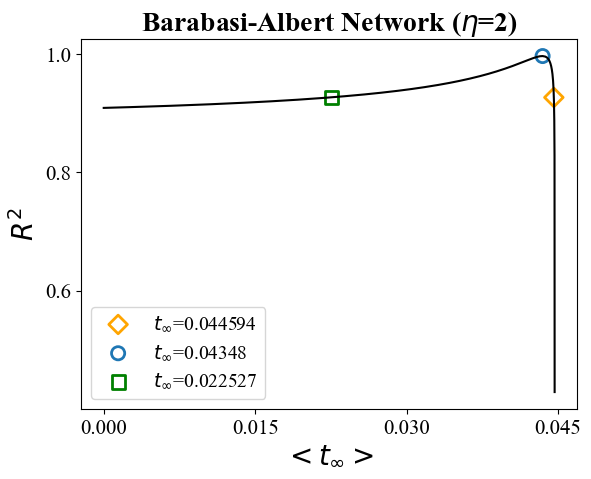

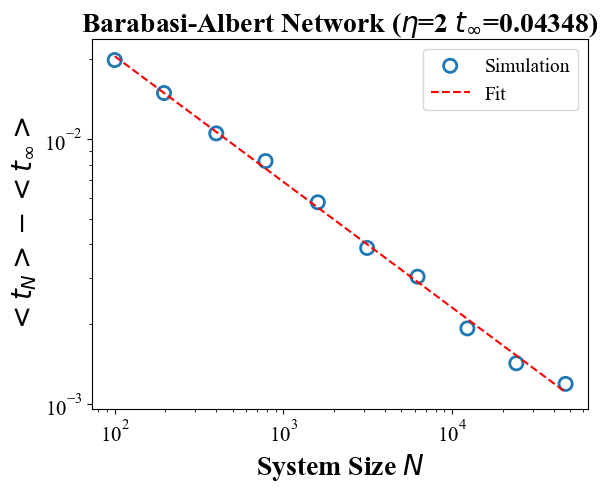

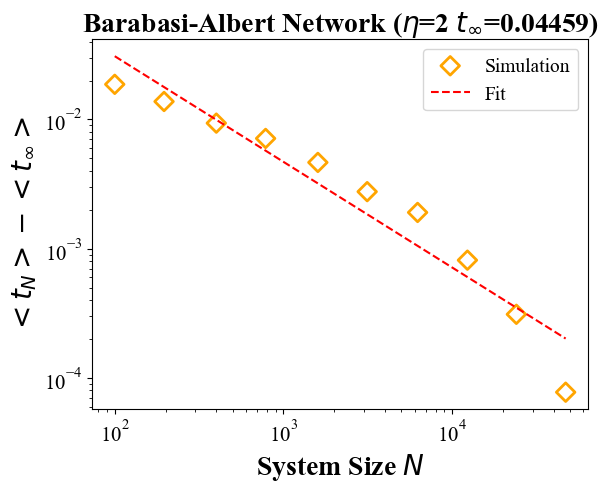

[0.1]


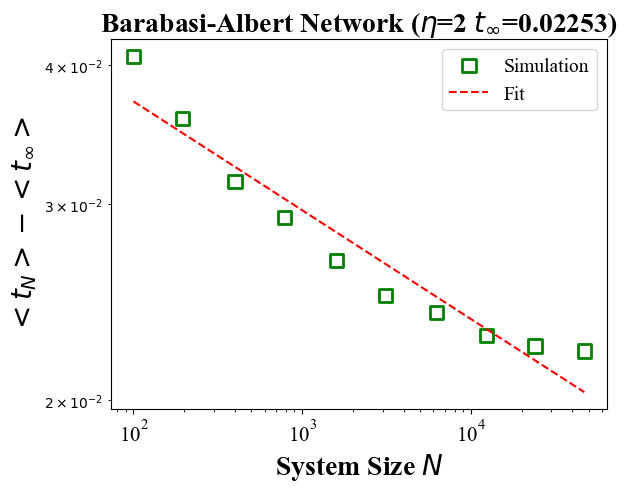

In [20]:
from matplotlib.ticker import LogLocator, MultipleLocator, MaxNLocator


net_name='BA'
net_name_show='Barabasi-Albert Network'


power_list=[0.5,1,2]
phi=1
shape_parameter_for_coupling=2

line_width_marker_set=2
max_tick_num=4
dpi_set=1000
marker_blue,marker_green,marker_yellow='o','s','D'


line_width_marker_set=2
max_tick_num=4
for power in power_list:
    mean_list=[]
    std_list=[]
    for N in N_list:
        lifetime_data=[]
        file_name=net_name+'_N='+str(N)+'_'+'power='+str(power)+'_shape='+str(shape_parameter_for_coupling)+'_phi='+str(phi)+'.txt'

        f=open('./life_data/'+net_name+'/'+file_name,'r')
        line=f.readline()
        while(line!=''):
            lifetime_data.append(float(line))
            line=f.readline()
        f.close()
        lifetime_data=lifetime_data[:500]
        mean_list.append(np.mean(lifetime_data))
        std_list.append(np.std(lifetime_data))
    #获取 不同t_inf下对应的R^2
    def R2_cal(mean_limit):   
        x_list=np.log(N_list)
        y_list=np.log(mean_list-mean_limit)
        return (np.corrcoef(x_list, y_list)[0, 1])**2
    def object_func(mean_limit):
        return -R2_cal(mean_limit)
    def judge_R_diff(R_list,threshold):
        max_diff=0
        for i in range(len(R_list)-1):
            max_diff=max(max_diff,abs(R_list[i+1]-R_list[i]))
        return max_diff<threshold
    threshold=0.001
    mean_limit_list=np.min(mean_list)-10**(np.linspace(-13,np.log(np.min(mean_list))/np.log(10),10))
    R_list=[]
    for mean_limit in mean_limit_list:
        R_list.append(R2_cal(mean_limit))
    while (not judge_R_diff(R_list,threshold)):
        new_mean_limit_list=[mean_limit_list[0]]
        new_R_list=[R_list[0]]
        for index_mean in range(len(mean_limit_list)-1):
            if(np.abs(R_list[index_mean+1]-R_list[index_mean])>threshold):
                insert_mean_limit=(mean_limit_list[index_mean+1]+mean_limit_list[index_mean])/2
                insert_R=R2_cal(insert_mean_limit)
                new_mean_limit_list.append(insert_mean_limit)
                new_R_list.append(insert_R)
            new_mean_limit_list.append(mean_limit_list[index_mean+1])
            new_R_list.append(R_list[index_mean+1])
        mean_limit_list=new_mean_limit_list
        R_list=new_R_list
    best_mean_limit=mean_limit_list[np.argmax(R_list)]
    mean_limit_left_list=mean_limit_list[:np.argmax(R_list)]
    R_list_left_list=np.array(R_list[:np.argmax(R_list)])
    mean_limit_right_list=mean_limit_list[np.argmax(R_list):]
    R_list_right_list=np.array(R_list[np.argmax(R_list):])
    suboptimal_left=(0.2*np.max(R_list)+0.8*np.min(R_list_left_list))
    suboptimal_right=(0.2*np.max(R_list)+0.8*np.min(R_list_right_list))
    suboptimal=max(suboptimal_right,suboptimal_left)
    R_left=R_list_left_list[np.argmin(np.abs(R_list_left_list-suboptimal))]
    mean_limit_left=mean_limit_left_list[np.argmin(np.abs(R_list_left_list-suboptimal))]
    R_right=R_list_right_list[np.argmin(np.abs(R_list_right_list-suboptimal))]
    mean_limit_right=mean_limit_right_list[np.argmin(np.abs(R_list_right_list-suboptimal))]
    #draw the best t_infinity
    plt.plot(mean_limit_list,R_list,c='black',linestyle='-')
    
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=max_tick_num))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=max_tick_num))
    plt.xticks(fontproperties = 'Times New Roman', size = special_tick_size)
    plt.yticks(fontproperties = 'Times New Roman', size = special_tick_size)    
    print(net_name)
    print("power="+str(power))
    print("Best: R^2="+str(round(R_list[np.argmax(R_list)],2)))
    print("orange: R^2="+str(round(R_left,2)))
    print("green: R^2="+str(round(R_right,2)))
    plt.scatter(mean_limit_left,R_left,edgecolors='orange',marker=marker_yellow,linewidth=line_width_marker_set,facecolors='none',label=r'$t_{\infty}$='+str(round(mean_limit_left,6)),s=size_marker)
    plt.scatter(best_mean_limit,np.max(R_list),edgecolors='#1f77b4',marker=marker_blue,linewidth=line_width_marker_set,facecolors='none',label=r'$t_{\infty}$='+str(round(best_mean_limit,6)),s=size_marker)
    plt.scatter(mean_limit_right,R_right,edgecolors='green',marker=marker_green,linewidth=line_width_marker_set,facecolors='none',label=r'$t_{\infty}$='+str(round(mean_limit_right,6)),s=size_marker)
    plt.legend(loc='lower left',prop=legend_font)
    plt.ylabel(r"$R^2$",fontproperties=label_special_font)
    plt.xlabel(r"$<t_{\infty}>$",fontproperties=label_special_font)
    plt.title(net_name_show+" ("+character_power+"="+str(power)+")",fontproperties=label_special_font)
    file_save_name='Mean_R2_mean_'+net_name_show+" ("+"power="+str(power)+").svg"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()

    #The best fitting for the scaling law of mean lifetime
    plt.scatter(N_list,mean_list-best_mean_limit,linewidth=line_width_marker_set,edgecolors='#1f77b4',marker=marker_blue, facecolors='none',label='Simulation',s=size_marker)
    x_list=np.log(N_list)
    y_list=np.log(mean_list-best_mean_limit)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')

    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-best_mean_limit)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)
    
    
    plt.xticks(fontproperties = 'Times New Roman', size=special_tick_size)  # 设置x轴刻度字体大小为special_tick_size
    plt.yticks(fontproperties = 'Times New Roman', size=special_tick_size)  # 设置y轴刻度字体大小为special_tick_size
    
    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(net_name_show+" ("+character_power+"="+str(power)+" "r'$t_{\infty}$='+str(round(best_mean_limit,5))+")",fontproperties=label_special_font)
    plt.legend(prop=legend_font)
    file_save_name='Mean_best_'+net_name_show+" ("+"power="+str(power)+")"+".png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()

    plt.scatter(N_list,mean_list-mean_limit_left,linewidth=line_width_marker_set,edgecolors='orange',marker=marker_yellow, facecolors='none',label='Simulation',s=size_marker)
    x_list=np.log(N_list)
    y_list=np.log(mean_list-mean_limit_left)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    # 计算回归线上的预测值
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')
    
    
    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-mean_limit_left)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)  
    plt.xticks(fontproperties = 'Times New Roman', size=special_tick_size)  # 设置x轴刻度字体大小为special_tick_size
    plt.yticks(fontproperties = 'Times New Roman', size=special_tick_size)  # 设置y轴刻度字体大小为special_tick_size

    
    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(net_name_show+" ("+character_power+"="+str(power)+" "r'$t_{\infty}$='+str(round(mean_limit_left,5))+")",fontproperties=label_special_font)
    plt.legend(prop=legend_font)
    file_save_name='Mean_rightBad_'+net_name_show+" ("+"power="+str(power)+")"+"R^2="+str(round(r_value**2,4))+".png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()

        #Fitting for the scaling law of mean lifetime when choosing suboptimal t_infinity (right suboptimal)
    plt.scatter(N_list,mean_list-mean_limit_right,linewidth=line_width_marker_set,edgecolors='green',marker=marker_green, facecolors='none',label='Simulation',s=size_marker)
    x_list=np.log(N_list)
    y_list=np.log(mean_list-mean_limit_right)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    # 计算回归线上的预测值
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')


    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-mean_limit_right)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)
    print(yticks)
    
    
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

    plt.xticks(fontproperties = 'Times New Roman', size = special_tick_size)
    plt.yticks(fontproperties = 'Times New Roman', size = special_tick_size)

    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(net_name_show+" ("+character_power+"="+str(power)+" "r'$t_{\infty}$='+str(round(mean_limit_right,5))+")",fontproperties=label_special_font)

    plt.legend(prop=legend_font)
    file_save_name='Mean_leftBad_'+net_name_show+" ("+"power="+str(power)+")"+"R^2="+str(round(r_value**2,4))+".png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()

orange: 0.6784
green: 0.6784


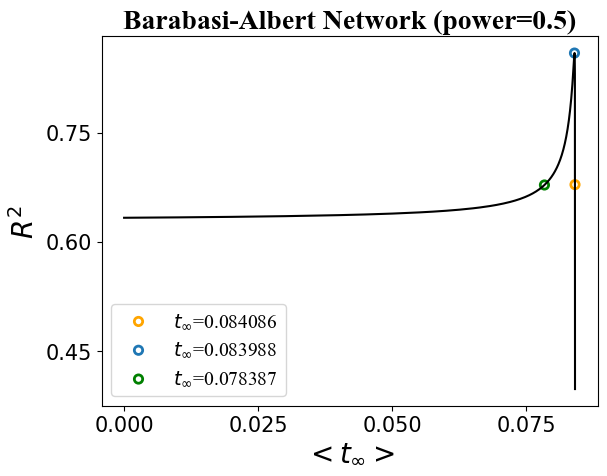

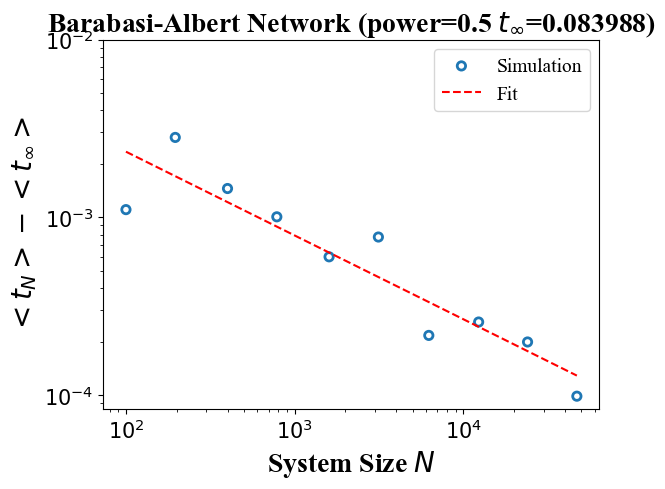

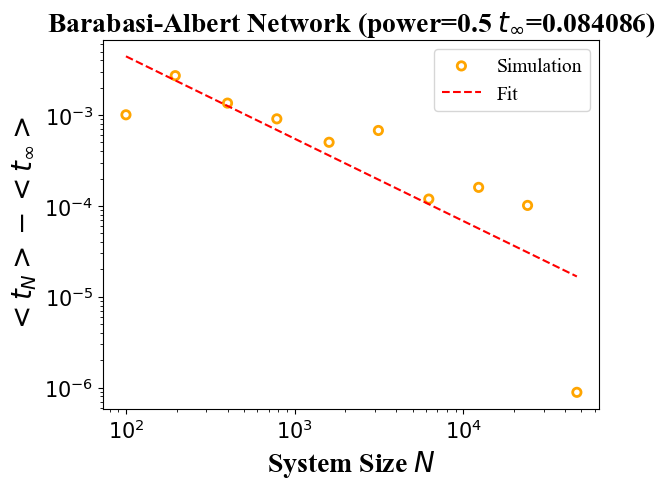

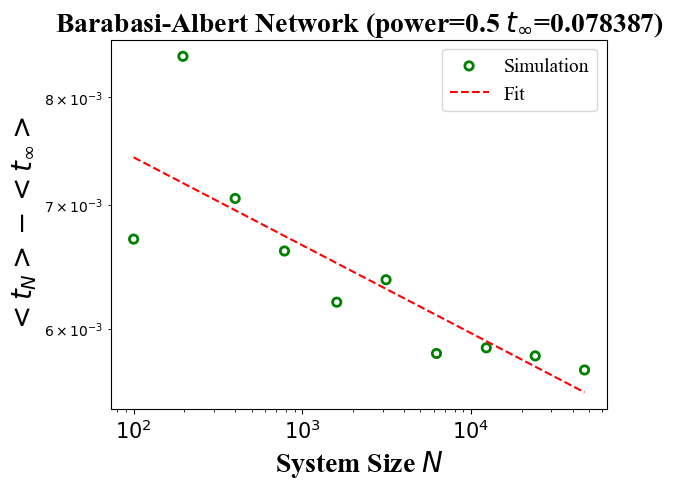

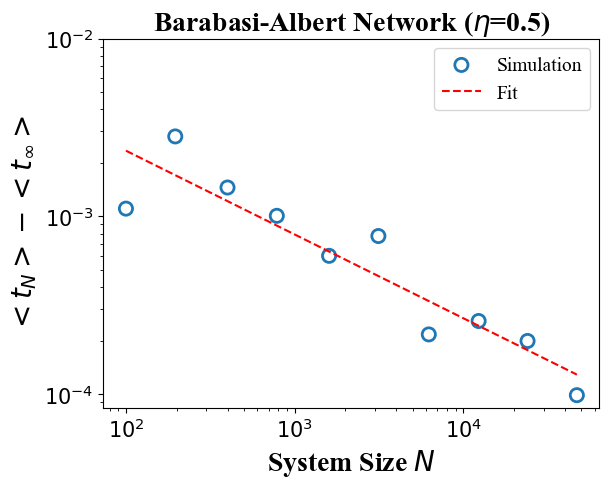

begin saving
slope:: -0.47121387689937905
intercept:-3.887834842363472
r_value : -0.9269870213753044
p-value : 0.00011376531982255584


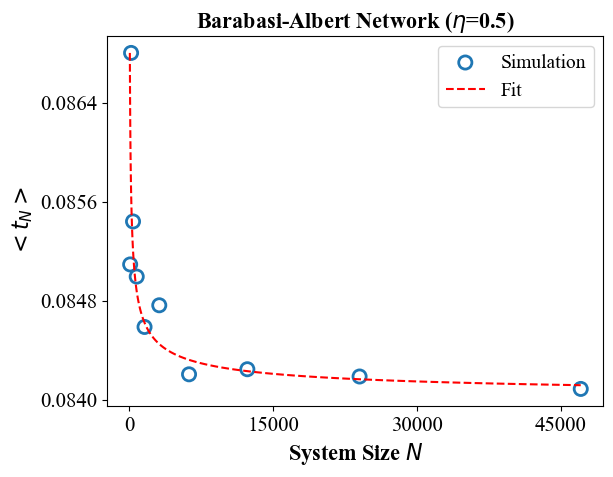

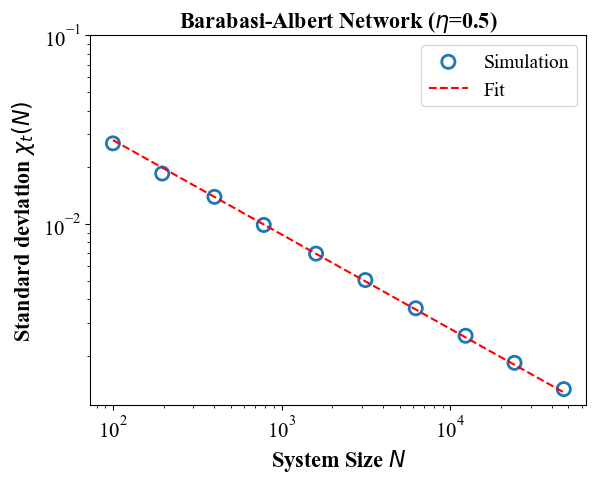

slope:: -0.5
intercept:-1.276747611234037
r_value : -0.9998698022769071
p-value : 1.256966664399788e-15


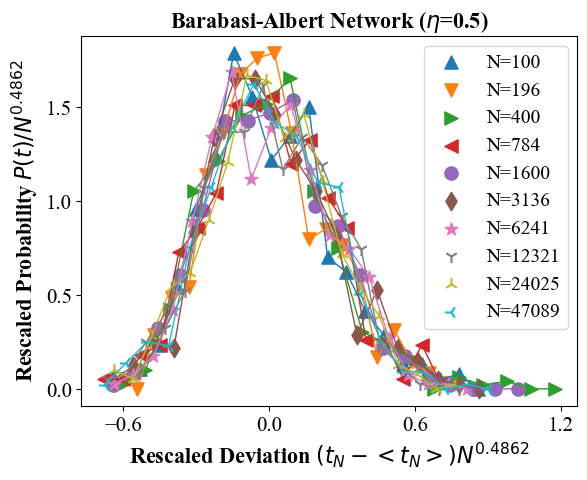

power=0.5
c1=0.0205 delta=-0.4712 alpha=0.4862


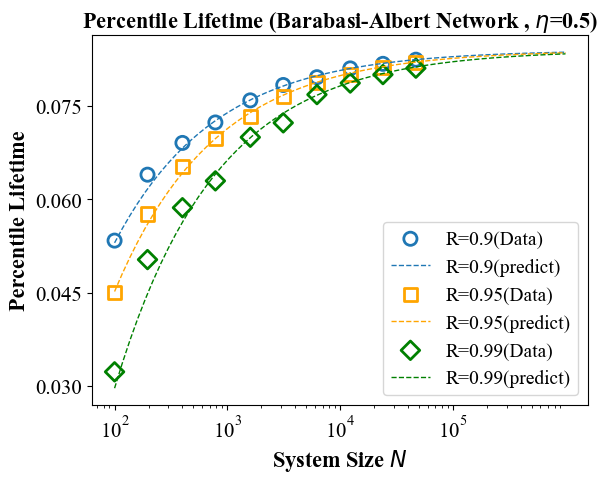

orange: 0.8556
green: 0.8556


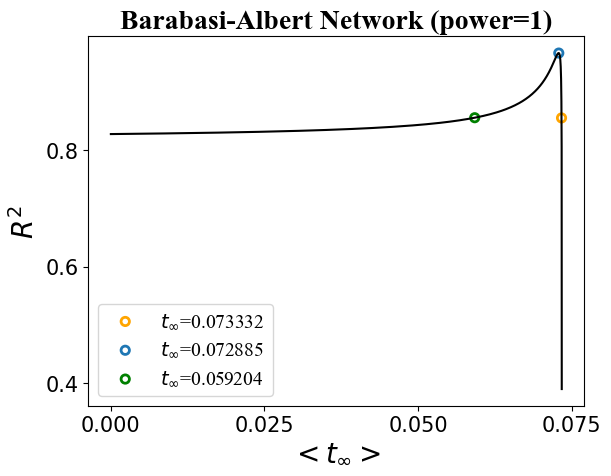

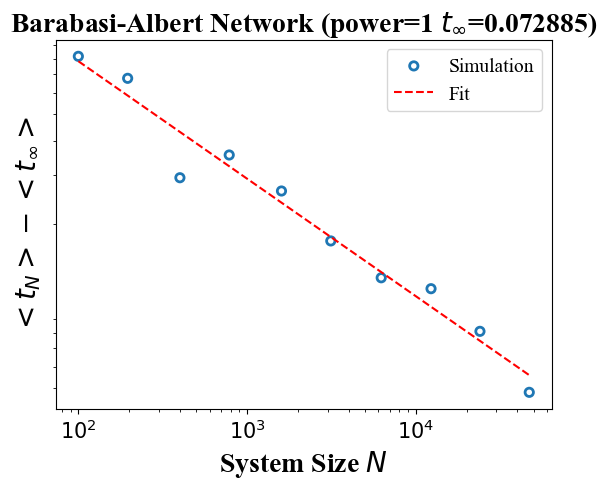

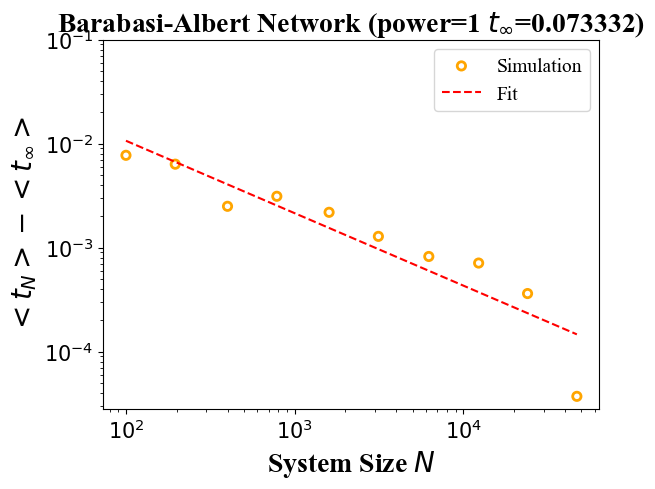

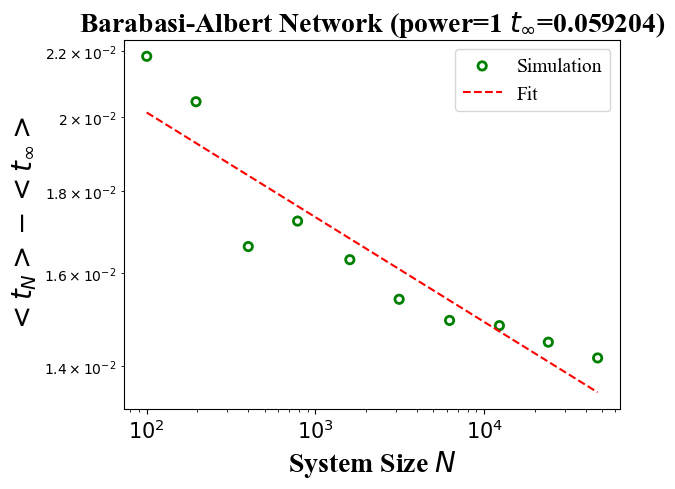

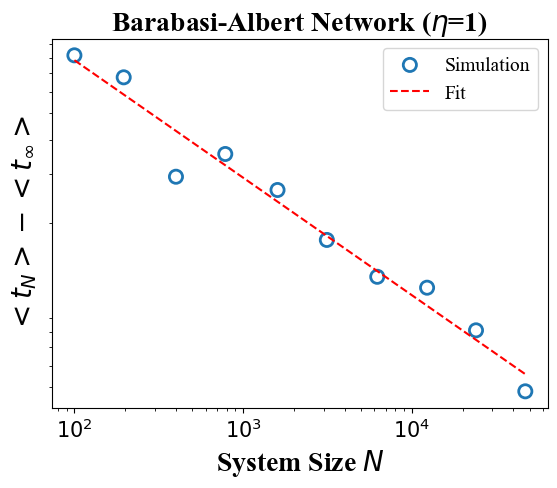

begin saving
slope:: -0.4287941883671621
intercept:-2.875744016481614
r_value : -0.9833699799933727
p-value : 3.2798639875673635e-07


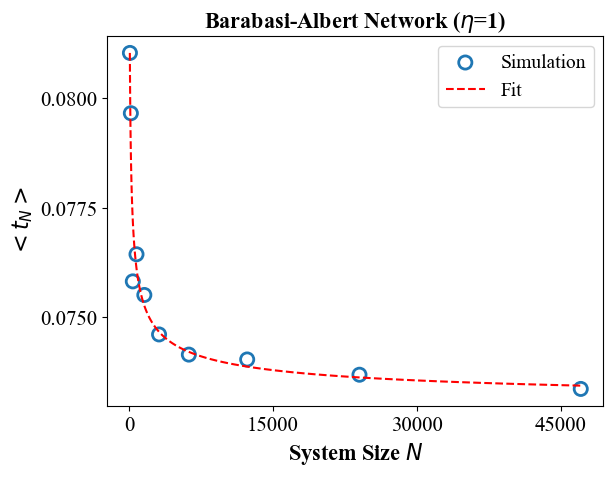

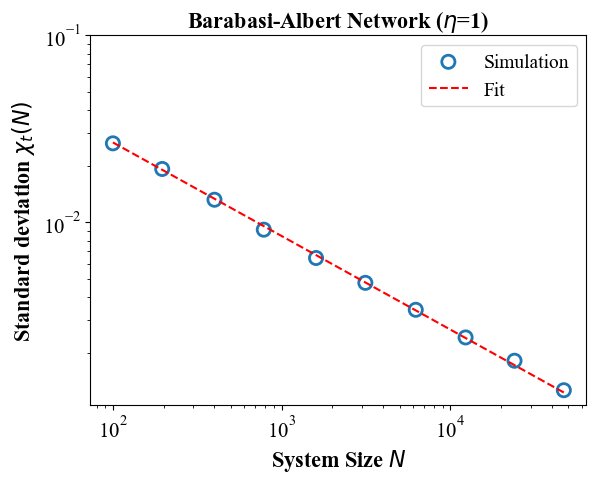

slope:: -0.5
intercept:-1.3175505834217942
r_value : -0.999745041467407
p-value : 1.8480911284564324e-14


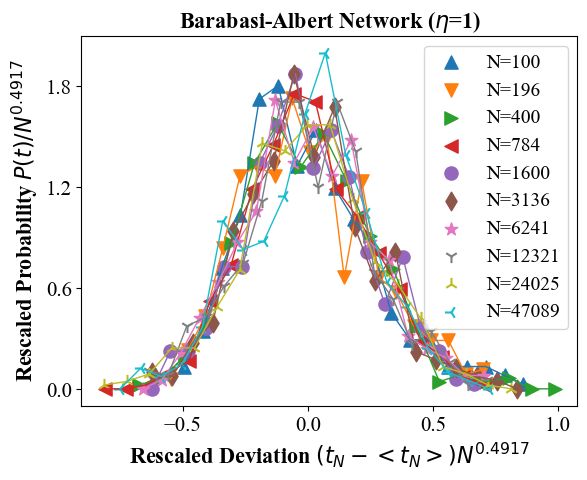

power=1
c1=0.0564 delta=-0.4288 alpha=0.4917


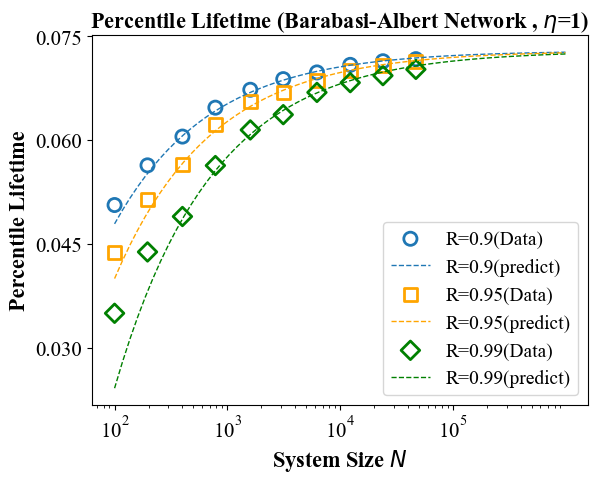

orange: 0.9269
green: 0.9269


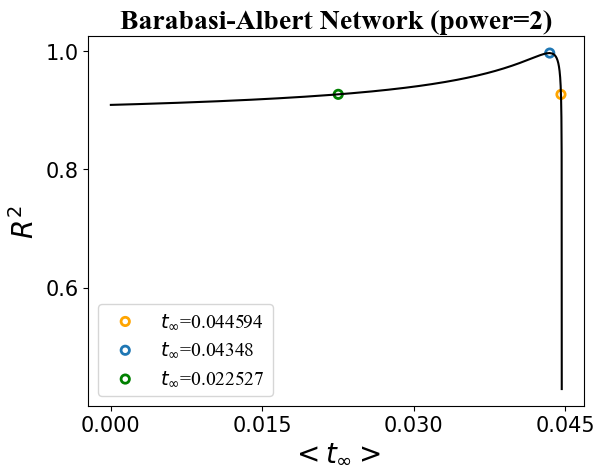

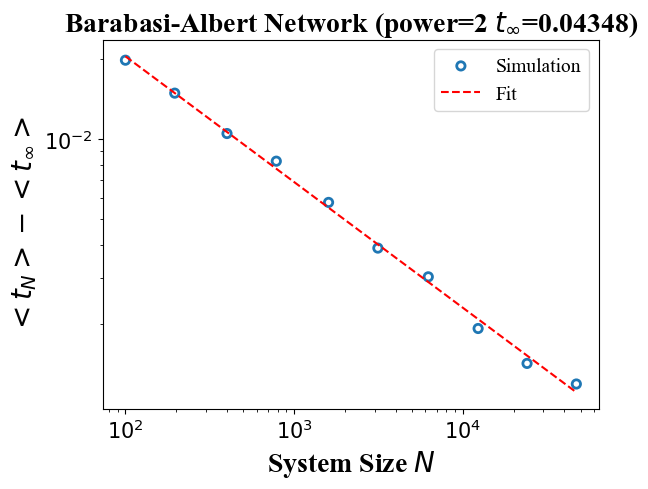

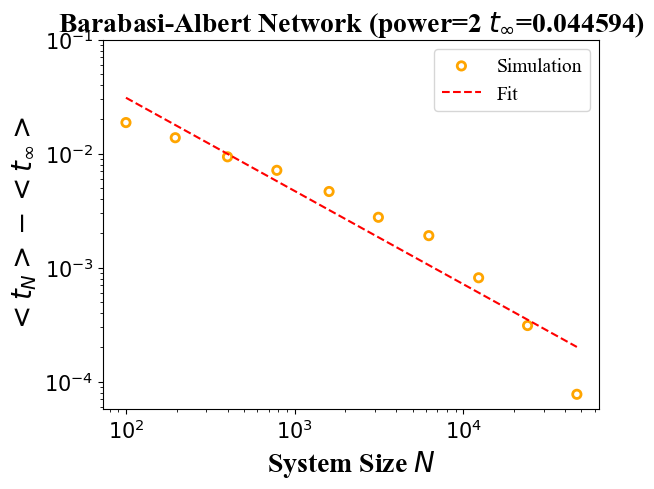

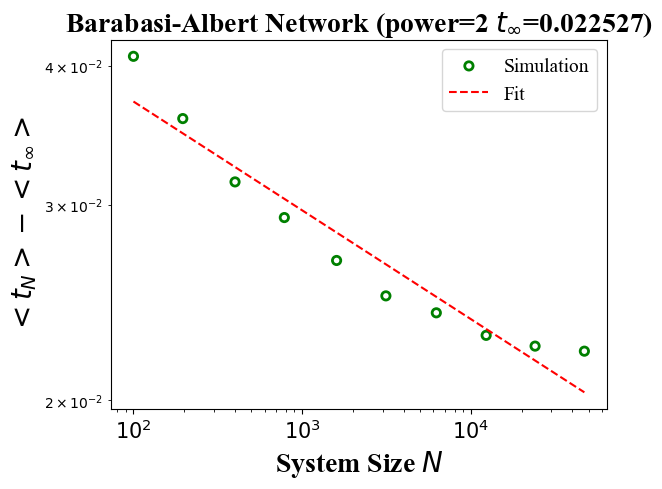

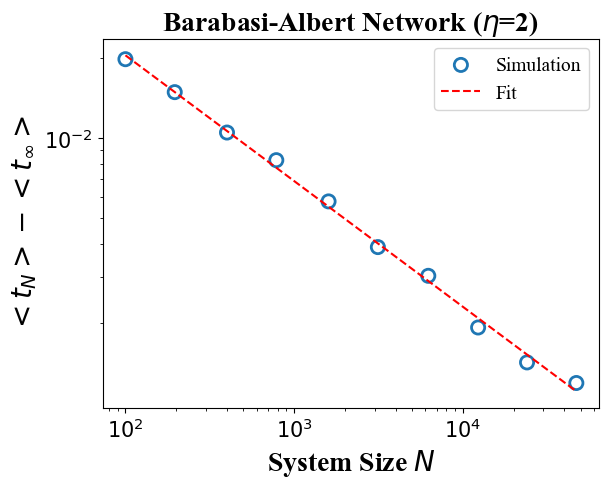

begin saving
slope:: -0.4740078637765751
intercept:-1.704649984680045
r_value : -0.9984395296512506
p-value : 2.5893255909439853e-11


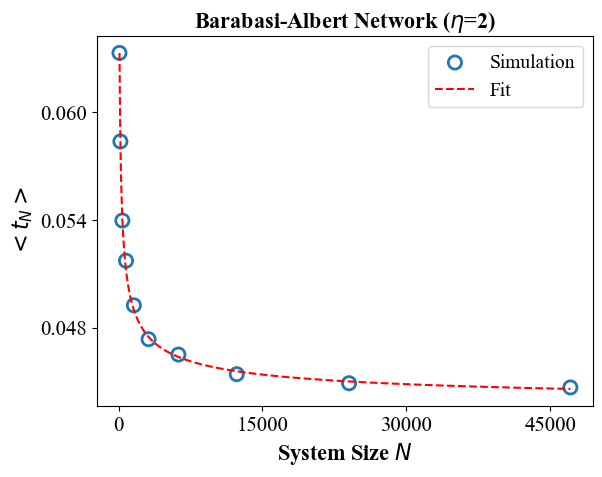

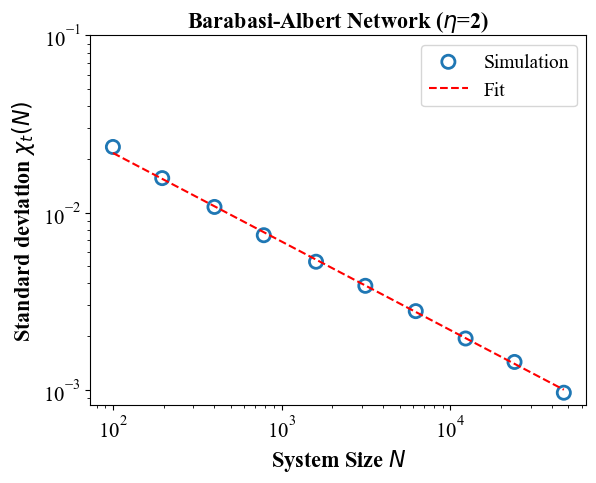

slope:: -0.5
intercept:-1.5281341494179763
r_value : -0.9995421723168442
p-value : 1.9210896675013043e-13


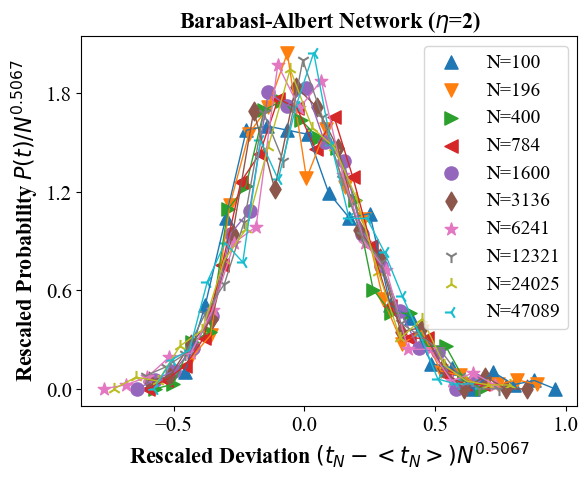

power=2
c1=0.1818 delta=-0.474 alpha=0.5067


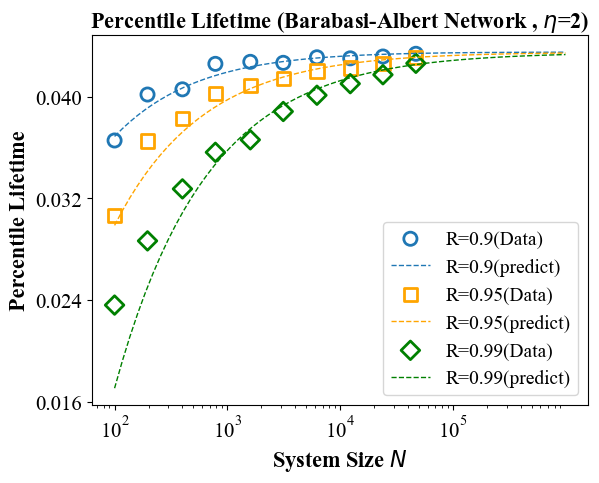

In [21]:
from matplotlib.ticker import LogLocator, MultipleLocator, MaxNLocator

net_name='BA'
net_name_show='Barabasi-Albert Network'


power_list=[0.5,1,2]
phi=1
shape_parameter_for_coupling=2

for power in power_list:
    mean_list=[]
    std_list=[]
    for N in N_list:
        lifetime_data=[]
        file_name=net_name+'_N='+str(N)+'_'+'power='+str(power)+'_shape='+str(shape_parameter_for_coupling)+'_phi='+str(phi)+'.txt'

        f=open('./life_data/'+net_name+'/'+file_name,'r')
        line=f.readline()
        while(line!=''):
            lifetime_data.append(float(line))
            line=f.readline()
        f.close()
        lifetime_data=lifetime_data[:500]
        mean_list.append(np.mean(lifetime_data))
        std_list.append(np.std(lifetime_data))
    #calculate R2 when t_infinity achieve different values.
    def R2_cal(mean_limit):   
        x_list=np.log(N_list)
        y_list=np.log(mean_list-mean_limit)
        return (np.corrcoef(x_list, y_list)[0, 1])**2
    def object_func(mean_limit):
        return -R2_cal(mean_limit)
    def judge_R_diff(R_list,threshold):
        max_diff=0
        for i in range(len(R_list)-1):
            max_diff=max(max_diff,abs(R_list[i+1]-R_list[i]))
        return max_diff<threshold
    threshold=0.001
    mean_limit_list=np.min(mean_list)-10**(np.linspace(-13,np.log(np.min(mean_list))/np.log(10),10))
    R_list=[]
    for mean_limit in mean_limit_list:
        R_list.append(R2_cal(mean_limit))
    while (not judge_R_diff(R_list,threshold)):
        new_mean_limit_list=[mean_limit_list[0]]
        new_R_list=[R_list[0]]
        for index_mean in range(len(mean_limit_list)-1):
            if(np.abs(R_list[index_mean+1]-R_list[index_mean])>threshold):
                insert_mean_limit=(mean_limit_list[index_mean+1]+mean_limit_list[index_mean])/2
                insert_R=R2_cal(insert_mean_limit)
                new_mean_limit_list.append(insert_mean_limit)
                new_R_list.append(insert_R)
            new_mean_limit_list.append(mean_limit_list[index_mean+1])
            new_R_list.append(R_list[index_mean+1])
        mean_limit_list=new_mean_limit_list
        R_list=new_R_list
    best_mean_limit=mean_limit_list[np.argmax(R_list)]
    mean_limit_left_list=mean_limit_list[:np.argmax(R_list)]
    R_list_left_list=np.array(R_list[:np.argmax(R_list)])
    mean_limit_right_list=mean_limit_list[np.argmax(R_list):]
    R_list_right_list=np.array(R_list[np.argmax(R_list):])
    suboptimal_left=(0.2*np.max(R_list)+0.8*np.min(R_list_left_list))
    suboptimal_right=(0.2*np.max(R_list)+0.8*np.min(R_list_right_list))
    suboptimal=max(suboptimal_right,suboptimal_left)
    R_left=R_list_left_list[np.argmin(np.abs(R_list_left_list-suboptimal))]
    mean_limit_left=mean_limit_left_list[np.argmin(np.abs(R_list_left_list-suboptimal))]
    R_right=R_list_right_list[np.argmin(np.abs(R_list_right_list-suboptimal))]
    mean_limit_right=mean_limit_right_list[np.argmin(np.abs(R_list_right_list-suboptimal))]
    
    #draw the best t_infinity
    plt.plot(mean_limit_list,R_list,c='black',linestyle='-')
    
    
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=max_tick_num))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=max_tick_num))
    ax = plt.gca()
    ax.tick_params(axis='x', labelsize=special_tick_size)  
    ax.tick_params(axis='y', labelsize=special_tick_size) 
    
    print("orange: "+str(round(R_left,4)))
    print("green: "+str(round(R_left,4)))
    plt.scatter(mean_limit_left,R_left,edgecolors='orange',linewidth=line_width_marker_set,facecolors='none',label=r'$t_{\infty}$='+str(round(mean_limit_left,6)))
    plt.scatter(best_mean_limit,np.max(R_list),edgecolors='#1f77b4',linewidth=line_width_marker_set,facecolors='none',label=r'$t_{\infty}$='+str(round(best_mean_limit,6)))
    plt.scatter(mean_limit_right,R_right,edgecolors='green',linewidth=line_width_marker_set,facecolors='none',label=r'$t_{\infty}$='+str(round(mean_limit_right,6)))
    plt.legend(loc='lower left',prop=legend_font)
    plt.ylabel(r"$R^2$",fontproperties=label_special_font)
    plt.xlabel(r"$<t_{\infty}>$",fontproperties=label_special_font)
    plt.title(net_name_show+" ("+"power="+str(power)+")",fontproperties=label_special_font)
    file_save_name='Mean_R2_mean_'+net_name_show+" ("+"power="+str(power)+").svg"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()

    #The best fitting for the scaling law of mean lifetime
    plt.scatter(N_list,mean_list-best_mean_limit,marker='o',linewidth=line_width_marker_set,edgecolors='#1f77b4', facecolors='none',label='Simulation')
    x_list=np.log(N_list)
    y_list=np.log(mean_list-best_mean_limit)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    #plt.title(net_name_show+" ("+"power="+str(power)+")",fontproperties=label_font)
    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-best_mean_limit)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)   
    ax = plt.gca()
    ax.tick_params(axis='x', labelsize=special_tick_size) 
    ax.tick_params(axis='y', labelsize=special_tick_size) 
    
    plt.title(net_name_show+" ("+"power="+str(power)+" "r'$t_{\infty}$='+str(round(best_mean_limit,6))+")",fontproperties=label_special_font)
    plt.legend(prop=legend_font)
    file_save_name='Mean_best_'+net_name_show+" ("+"power="+str(power)+")"+".png"
    #plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()

    #Fitting for the scaling law of mean lifetime when choosing suboptimal t_infinity (left suboptimal)
    plt.scatter(N_list,mean_list-mean_limit_left,marker='o',linewidth=line_width_marker_set,edgecolors='orange', facecolors='none',label='Simulation')
    x_list=np.log(N_list)
    y_list=np.log(mean_list-mean_limit_left)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')
    plt.xscale('log')
    plt.yscale('log')
    
    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-mean_limit_left)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)  
    ax = plt.gca()
    ax.tick_params(axis='x', labelsize=special_tick_size)  # 设置x轴刻度字体大小为special_tick_size
    ax.tick_params(axis='y', labelsize=special_tick_size)  # 设置y轴刻度字体大小为special_tick_size


    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    #plt.title(net_name_show+" ("+"power="+str(power)+")",fontproperties=label_font)
    plt.title(net_name_show+" ("+"power="+str(power)+" "r'$t_{\infty}$='+str(round(mean_limit_left,6))+")",fontproperties=label_special_font)
    plt.legend(prop=legend_font)
    file_save_name='Mean_rightBad_'+net_name_show+" ("+"power="+str(power)+")"+"R^2="+str(round(r_value,4))+".png"
    #plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()

    #Fitting for the scaling law of mean lifetime when choosing suboptimal t_infinity (right suboptimal)
    plt.scatter(N_list,mean_list-mean_limit_right,marker='o',linewidth=line_width_marker_set,edgecolors='green', facecolors='none',label='Simulation')
    x_list=np.log(N_list)
    y_list=np.log(mean_list-mean_limit_right)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')
    plt.xscale('log')
    plt.yscale('log')
    ax = plt.gca()
    ax.tick_params(axis='x', labelsize=special_tick_size) 
    ax.tick_params(axis='y', labelsize=special_tick_size) 

    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-mean_limit_right)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)
    
    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    plt.title(net_name_show+" ("+"power="+str(power)+" "r'$t_{\infty}$='+str(round(mean_limit_right,6))+")",fontproperties=label_special_font)

    plt.legend(prop=legend_font)
    file_save_name='Mean_leftBad_'+net_name_show+" ("+"power="+str(power)+")"+"R^2="+str(round(r_value,4))+".png"
    #plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()
    
    plt.scatter(N_list,mean_list-best_mean_limit,marker='o',linewidth=line_width_marker_set,edgecolors='#1f77b4', facecolors='none',label='Simulation',s=size_marker)
    x_list=np.log(N_list)
    y_list=np.log(mean_list-best_mean_limit)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')
    
    plt.xscale('log')
    plt.yscale('log')
    ax = plt.gca()
    ax.tick_params(axis='x', labelsize=special_tick_size)  
    ax.tick_params(axis='y', labelsize=special_tick_size)

    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(list(mean_list-best_mean_limit)+list(np.exp(regression_line)))/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)   
    
    plt.xlabel("System Size "+r"$N$",fontproperties=label_special_font)
    plt.ylabel(r"$<t_N>-<t_{\infty}>$",fontproperties=label_special_font)
    plt.title(net_name_show+" ("+character_power+"="+str(power)+")",fontproperties=label_special_font)
    plt.legend(prop=legend_font)
    file_save_name='Mean_loglog_'+net_name_show+" ("+"power="+str(power)+")"+".png"
    
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')

    plt.show()
    
    print("begin saving")
    t_inf=best_mean_limit.copy()
    delta=slope.copy()
    c1=np.exp(intercept)
    
    print(f'slope:: {slope}')
    print(f'intercept:{intercept}')
    print(f'r_value : {r_value}')
    print(f'p-value : {p_value}')
    
    
    x_min_to_show=(np.log(np.max(mean_list)-best_mean_limit)-intercept)/slope
    x_list_to_show=np.linspace(x_min_to_show,np.log(np.max(N_list)),100)
    plt.scatter(N_list,mean_list,linewidth=line_width_marker_set,edgecolors='#1f77b4', facecolors='none',label='Simulation',s=size_marker)
    regression_line_toshow = slope * x_list_to_show + intercept
    plt.plot(np.exp(x_list_to_show), np.exp(regression_line_toshow)+best_mean_limit, color='red', label='Fit',linestyle='--')
    plt.xlabel("System Size "+r"$N$",fontproperties=label_font)
    plt.ylabel(r"$<t_N>$",fontproperties=label_font)
    
    #y_to_show=np.linspace(np.min(mean_list),np.max(mean_list),3)
    #plt.yticks(y_to_show)    
    
    plt.xticks(fontproperties = 'Times New Roman', size = special_tick_size)
    plt.yticks(fontproperties = 'Times New Roman', size = special_tick_size)
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=4))
    
    plt.title(net_name_show+" ("+character_power+"="+str(power)+")",fontproperties=label_font)
    plt.legend(prop=legend_font)
    file_save_name='Mean_allFit_'+net_name_show+" ("+"power="+str(power)+").png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()
    
    
    #Scaling law of standard deviation
    plt.scatter(N_list,std_list,linewidth=line_width_marker_set,edgecolors='#1f77b4', facecolors='none',label='Simulation',s=size_marker)
    x_list=np.log(N_list)
    y_list=np.log(std_list)
    slope, intercept, r_value, p_value, std_err = linregress(x_list, y_list)
    alpha=copy.deepcopy(slope) 
    slope=-0.5 # draw the straight line of slope 1/2
    intercept=np.mean(y_list)-np.mean(x_list)*slope
    regression_line = slope * x_list + intercept
    plt.plot(np.exp(x_list), np.exp(regression_line), color='red', label='Fit',linestyle='--')
    plt.xscale('log')
    plt.yscale('log')
    
    value_list=np.log(N_list)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)   
    value_list=np.log(std_list)/np.log(10)
    yticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.yticks(yticks)   

    
    plt.xlabel("System Size "+r"$N$",fontproperties=label_font)
    plt.ylabel(r"Standard deviation $\chi_t(N)$",fontproperties=label_font)
    plt.title(net_name_show+" ("+character_power+"="+str(power)+")",fontproperties=label_font)
    plt.legend(prop=legend_font)
    plt.xticks(fontproperties = 'Times New Roman', size = special_tick_size)
    plt.yticks(fontproperties = 'Times New Roman', size = special_tick_size)
    file_save_name='std_'+net_name_show+" ("+"power="+str(power)+")"+".png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()
    print(f'slope:: {slope}')
    print(f'intercept:{intercept}')
    print(f'r_value : {r_value}')
    print(f'p-value : {p_value}')

    
    #calculate the universal function g by rescaling lifetime data
    marker_list=['^','v','>','<','o','d','*','1','2','3','4','+','x','|','_']
    for index_N in range(len(N_list)):
        N=N_list[index_N]
        density_marker=marker_list[index_N]
        lifetime_data=[]
        file_name=net_name+'_N='+str(N)+'_'+'power='+str(power)+'_shape='+str(shape_parameter_for_coupling)+'_phi='+str(phi)+'.txt'

        f=open('./life_data/'+net_name+'/'+file_name,'r')
        line=f.readline()
        while(line!=''):
            lifetime_data.append(float(line))
            line=f.readline()
        f.close()
        lifetime_data=lifetime_data[:500]
        min_life=np.min(lifetime_data)
        max_life=np.max(lifetime_data)
        cut_list=np.linspace(min_life,max_life,20)
        mid_list=[]
        distri_value_list=[]
        for index_cut in range(len(cut_list)-1):
            down=cut_list[index_cut]
            up=cut_list[index_cut+1]
            mid_list.append(((up+down)/2))
            distri_value_list.append(np.sum((lifetime_data>down)&(lifetime_data<up))/(len(lifetime_data)*(up-down)))
        distri_value_list=np.array(distri_value_list)
        mid_list=np.array(mid_list)
        plt.scatter((mid_list-np.mean(lifetime_data))/N**alpha,distri_value_list*N**alpha,marker=density_marker,label='N='+str(N),s=size_marker)
        plt.plot((mid_list-np.mean(lifetime_data))/N**alpha,distri_value_list*N**alpha,linewidth=1)
    plt.legend(prop=legend_font)
    plt.xlabel("Rescaled Deviation "+r"$(t_N-<t_N>)$"+r'$N^{{{}}}$'.format(round(-alpha,4)),fontproperties=label_font)
    plt.ylabel("Rescaled Probability "+r"$P(t)/$"+r'$N^{{{}}}$'.format(round(-alpha,4)),fontproperties=label_font)
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=4))
    
    plt.xticks(fontproperties = 'Times New Roman', size = special_tick_size)
    plt.yticks(fontproperties = 'Times New Roman', size = special_tick_size)

    plt.title(net_name_show+" ("+character_power+"="+str(power)+")",fontproperties=label_font)
    file_save_name='unifuc_'+net_name_show+" ("+"power="+str(power)+")"+".png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()
    

    
    
    #rescaled universal distribution, which correspond to g(delta t)
    all_scaled_samples=[]
    mean_list=[]
    for N in N_list:
        lifetime_data=[]
        file_name=net_name+'_N='+str(N)+'_'+'power='+str(power)+'_shape='+str(shape_parameter_for_coupling)+'_phi='+str(phi)+'.txt'
        f=open('./life_data/'+net_name+'/'+file_name,'r')
        line=f.readline()
        while(line!=''):
            lifetime_data.append(float(line))
            line=f.readline()
        f.close()
        lifetime_data=lifetime_data[:500]
        mean_list.append(np.mean(lifetime_data))
        lifetime_data=np.array(lifetime_data)-np.mean(lifetime_data)
        lifetime_data=lifetime_data*N**(-alpha)
        all_scaled_samples+=list(lifetime_data)


    #1. calculate quantile  from rescaled universal distribution
    Reliability_list=np.linspace(0.99,0.01,99)
    Reliability_list=np.arange(0.995,0.001,-0.001)

    kappa_list=[] # Quantile corresponding to different reliablity
    all_scaled_samples.sort()
    for Reliability in Reliability_list:
        rank=int((1-Reliability)*len(all_scaled_samples))
        kappa_list.append(all_scaled_samples[rank])
    #2. calculate quantile at given system size N
    N_test_list=[100,200,500,1000,10000,100000]
    for N in N_test_list:
        t_frac=best_mean_limit+np.array(kappa_list)*N**(alpha)+c1*N**delta
        t_frac=[0]+list(t_frac)
        Reliability_show_list=[1]+list(Reliability_list)
        plt.plot(t_frac,Reliability_show_list,label='N='+str(N))
    plt.plot([0,0.12],[0.95,0.95], color='black', linestyle='--',label='R=0.95')
    plt.legend(prop=legend_font)
    plt.ylabel("Reliability",fontproperties=label_font)
    plt.xlabel("Time",fontproperties=label_font)
    plt.title("Predict Reliability "+"("+net_name_show+" , "+character_power+"="+str(power)+")",fontproperties=label_font)
    #file_save_name="PredictReliability_"+net_name_show+"_power="+str(power)+".png"
    #plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.close()
    print("power="+str(power))    
    print('c1='+str(round(c1,4))+' delta='+str(round(delta,4))+' alpha='+str(round(-alpha,4)))
    
    
    # Predicting percentile lifetime
    Reliability_test_list=[0.9,0.95,0.99] # Demonstrate percentile lifetime corresponding when reliability is 0.9,0.95,0.99
    marker_list_known=['o','s','D']
    color_list=['#1f77b4','orange','green']
    for index_R in range(len(Reliability_test_list)):
        #1.empirical distribution
        color=color_list[index_R]
        Reliability=Reliability_test_list[index_R]
        marker_known=marker_list_known[index_R]
        t_critical_empirical=[]
        for N in N_list:
            lifetime_data=[]
            file_name=net_name+'_N='+str(N)+'_'+'power='+str(power)+'_shape='+str(shape_parameter_for_coupling)+'_phi='+str(phi)+'.txt'
            f=open('./life_data/'+net_name+'/'+file_name,'r')
            line=f.readline()
            while(line!=''):
                lifetime_data.append(float(line))
                line=f.readline()
            f.close()
            lifetime_data.sort()
            rank=int((1-Reliability)*len(lifetime_data))
            t_critical_empirical.append(lifetime_data[rank])
        plt.scatter(N_list,t_critical_empirical,label='R='+str(Reliability)+"(Data)",marker=marker_known,linewidth=line_width_marker_set,edgecolors=color, facecolors='none',s=size_marker)
        #2. predict distribution based on the universal function (charactered by quantile)
        N_test=np.logspace(start=2, stop=6, num=60)
        rank=int((1-Reliability)*len(all_scaled_samples))
        kappa=all_scaled_samples[rank]
        t_critical_predict=best_mean_limit+kappa*N_test**alpha+c1*N_test**delta
        plt.plot(N_test,t_critical_predict,linewidth=1,label='R='+str(Reliability)+"(predict)",c=color,linestyle='--')
        #plt.scatter(x, y, s=100, edgecolors='b', facecolors='none', marker='o')

    plt.xscale('log')    
    value_list=np.log(N_test)/np.log(10)
    xticks=tranform_ticks_log(np.min(value_list),np.max(value_list),max_tick_num)
    plt.xticks(xticks)    
    plt.xlabel("System Size "+r"$N$",fontproperties=label_font)
    plt.ylabel("Percentile Lifetime",fontproperties=label_font)

    plt.xticks(fontproperties = 'Times New Roman', size = special_tick_size)
    plt.yticks(fontproperties = 'Times New Roman', size = special_tick_size)

    plt.legend(prop=legend_font)
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
    
    plt.title("Percentile Lifetime"+" ("+net_name_show+" , "+character_power+"="+str(power)+")",fontproperties=label_font)
    file_save_name="ReliabilityLifetime_"+net_name_show+"_power="+str(power)+".png"
    plt.savefig("./fig_Maintext/"+net_name+"/"+file_save_name,dpi=dpi_set,bbox_inches='tight')
    plt.show()